### Fromat of the generator
1. English Bible verse + hebrew text
2. List of videos to loop
3. 

In [1]:
import sys
sys.path.append('../') # so that we can import packages from parent folder

from src.video_composition.composer import VideoComposition

from src.video_composition.combo.tts_component import TTSComponent
from src.video_composition.video.looping_mp4 import LoopingMP4

import matplotlib.pyplot as plt
%matplotlib inline

#4 seconds

 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > initialization of speaker-embedding layers.


In [7]:
verse = 'Should you not fear me? declares the Lord. Should you not tremble in my presence? I made the sand a boundary for the sea, an everlasting barrier it cannot cross. The waves may roll, but they cannot prevail; they may roar, but they cannot cross it.'
hebrew = '''
הַאֹותִ֨י לֹא־תִירָ֜אוּ נְאֻם־יְהֹוָ֗ה אִ֤ם מִפָּנַי֙ לֹ֣א תָחִ֔ילוּ אֲשֶׁר־שַׂ֤מְתִּי חֹול֙ גְּב֣וּל לַיָּ֔ם חָק־עֹולָ֖ם וְלֹ֣א יַעַבְרֶ֑נְהוּ וַיִּֽתְגָּעֲשׁוּ֙ וְלֹ֣א יוּכָ֔לוּ וְהָמ֥וּ גַלָּ֖יו וְלֹ֥א יַעַבְרֻֽנְהוּ
'''
location = 'Jeremiah 5:22'

# a list of pairs of filenames and percentages
transitionTimestamps = [('light.mp4', '40'), ('waves.mp4', '60')]

print(verse)
print(hebrew)

Should you not fear me? declares the Lord. Should you not tremble in my presence? I made the sand a boundary for the sea, an everlasting barrier it cannot cross. The waves may roll, but they cannot prevail; they may roar, but they cannot cross it.

הַאֹותִ֨י לֹא־תִירָ֜אוּ נְאֻם־יְהֹוָ֗ה אִ֤ם מִפָּנַי֙ לֹ֣א תָחִ֔ילוּ אֲשֶׁר־שַׂ֤מְתִּי חֹול֙ גְּב֣וּל לַיָּ֔ם חָק־עֹולָ֖ם וְלֹ֣א יַעַבְרֶ֑נְהוּ וַיִּֽתְגָּעֲשׁוּ֙ וְלֹ֣א יוּכָ֔לוּ וְהָמ֥וּ גַלָּ֖יו וְלֹ֥א יַעַבְרֻֽנְהוּ



In [8]:
# clouds = './videos/clouds.mp4'
# cabin = './videos/cabin.mp4'
# nature = './videos/nature.mp4'

# images = [(clouds, 1/3), (cabin, 1/2), (nature, 1/6)]


# output_file = "output/bible.mp4"

# tts = TTSComponent(verse + " " + location, color=(200, 10, 0), height=1024, width=1024)

# third = tts.total_duration()/3
# half = tts.total_duration()/2
# sixth = tts.total_duration()/6

# mp4 = LoopingMP4(clouds, fps=30, start=0, duration=third, reverse_loop=True, speed_factor=1)
# mp4a = LoopingMP4(cabin, fps=30, start=third, duration=half, reverse_loop=True, speed_factor=0.5)
# mp4b = LoopingMP4(nature, fps=30, start=sixth*5, duration=sixth, reverse_loop=True, speed_factor=2)

# video_composition = VideoComposition(width=mp4.width, height=mp4.height, fps=mp4.fps)
# video_composition.add_component(mp4)
# video_composition.add_component(mp4a)
# video_composition.add_component(mp4b)

# video_composition.add_component(tts)

# video_composition.create_video(output_file)


In [9]:
# def create_composition(images, verse, location, output_path):
#     height = 1920
#     width = 1080
#     fps = 30
#     tts_component = TTSComponent(verse + " " + location, color=(200, 10, 0), height=height, width=width, fps=fps)

#     total_duration = tts_component.total_duration()
    
#     video_composition = VideoComposition(width=width, height=height, fps=fps)
    
#     current_start_time = 0
    
#     for image, fraction, speed, loop in images:
#         duration = total_duration * fraction
#         mp4_component = LoopingMP4(image, fps=30, start=current_start_time, duration=duration, reverse_loop=loop, speed_factor=speed)
        
#         video_composition.add_component(mp4_component)
#         current_start_time += duration

#     video_composition.add_component(tts_component)

#     video_composition.create_video(output_path)

# # Loop, restart, or stretch the video to match the duration of the tts
# images = [('./videos/clouds.mp4', 1/3, 2, True), ('./videos/cabin.mp4', 1/6, 3, False), ('./videos/nature.mp4', 1/2, 4, True)]
# # verse = "Some verse"
# # location = "Some location"
# output_file = "output/bible.mp4"

# create_composition(images, verse, location, output_file)



In [5]:
def match_duration_with_tts(input_video, verse, location, output_path):
    height = 1920
    width = 1080
    fps = 30

    tts_component = TTSComponent(verse + " " + location, color=(200, 10, 0), plt=plt)
    tts_duration = tts_component.total_duration()

    # Create a temporary LoopingMP4 component to get the original video duration
    video_duration = LoopingMP4.get_video_duration(input_video)
    

    # Calculate speed factor
    speed_factor = video_duration / tts_duration
    if speed_factor > 1:
        speed_factor = 1

    print("@@@@@@@@@@@@@@$$$$$$$$$$")
    print(input_video)
    print(speed_factor)
    print(tts_duration)
    print(video_duration)
    print(video_duration / speed_factor)
    print("@@@@@@@@@@@@@@$$$$$$$$$$")

    # # Initialize VideoComposition
    video_composition = VideoComposition(width=width, height=height, fps=fps)

    # # Create MP4 component with speed adjusted to match TTS duration
    mp4_component = LoopingMP4(input_video, fps=30, start=0, duration=tts_duration, reverse_loop=False, speed_factor=speed_factor)

    video_composition.add_component(mp4_component)
    video_composition.add_component(tts_component)

    video_composition.create_video(output_path)
    mp4_component.close()
    
# Loop, restart, or stretch the video to match the duration of the tts
# verse = "Some verse"
# location = "Some location"
# input_video = './videos/ocean_22s.mp4'

# Testing or running individual videos
#verse = 'Jesus answered, “The most important is, Hear, O Israel: The Lord our God, the Lord is one. And you shall love the Lord your God with all your heart and with all your soul and with all your mind and with all your strength. The second is this: You shall love your neighbor as yourself. There is no other commandment greater than these.'
#location = 'Psalm 1 verse 1 to 3'
#input_video = './videos/mountains_drone_35sec.mp4'
#output_file = "output/bible2.mp4"

#match_duration_with_tts(input_video, verse, location, output_file)


Writing  Leviticus chapter 19 verse 17 to 18  to  output/mebible/Leviticus_chapter_19_verse_17_to_18.mp4
 > Text splitted to sentences.
['You shall not hate your brother in your heart.']
 > Processing time: 0.6167140007019043
 > Real-time factor: 0.24471896982934405
 ---- 
sentence: You shall not hate your brother in your heart.
split: 9 word indices: 9
sum split: 9 sum word indices: 9
 > Text splitted to sentences.
['You shall surely rebuke your neighbor, and not bear sin because of him.']
 > Processing time: 1.1123149394989014
 > Real-time factor: 0.2554422639554947
 ---- 
sentence: You shall surely rebuke your neighbor, and not bear sin because of him.
split: 13 word indices: 13
sum split: 22 sum word indices: 22
 > Text splitted to sentences.
['You shall not take vengeance, nor bear any grudge against the children of your people; but you shall love your neighbor as yourself.']
 > Processing time: 1.9469220638275146
 > Real-time factor: 0.267427685558885
 ---- 
sentence: You shall n

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --di

Finished running ffmpeg command


Updated Speed factor: 0.5768118735543563


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.5768118735543563
Component: 0 - 592
Duration: 19.763809523809524
Current frame: 0, adjusted current frame: 0, total frames: 342
Current frame: 100, adjusted current frame: 57, total frames: 342
Current frame: 200, adjusted current frame: 115, total frames: 342
Current frame: 300, adjusted current frame: 173, total frames: 342
Current frame: 400, adjusted current frame: 230, total frames: 342
Current frame: 500, adjusted current frame: 288, total frames: 342
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpiqu2brz7.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp0qm59wo7.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Leviticus_chapter_19_verse_17_to_18.mp4
Writing  Isaiah chapter 40 verse 8  to  output/mebible

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --di

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 210
Duration: 7.025487528344671
Current frame: 0, adjusted current frame: 0, total frames: 317
Current frame: 100, adjusted current frame: 76, total frames: 317
Current frame: 200, adjusted current frame: 153, total frames: 317
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpo__216wv.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp1ccj1_ac.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Isaiah_chapter_40_verse_8.mp4


python3(23268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Exodus chapter 15 verse 1 to 2  to  output/mebible/Exodus_chapter_15_verse_1_to_2.mp4
 > Text splitted to sentences.
['Then Moses and the children of Israel sang this song to Yahweh, and said, I will sing to Yahweh, for he has triumphed gloriously.']


python3(23269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23272) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.52174711227417
 > Real-time factor: 0.331073901029136
 ---- 
sentence: Then Moses and the children of Israel sang this song to Yahweh, and said, I will sing to Yahweh, for he has triumphed gloriously.
split: 24 word indices: 24
sum split: 24 sum word indices: 24
 > Text splitted to sentences.
['He has thrown the horse and his rider into the sea.']


python3(23275) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23276) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23277) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23278) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6408970355987549
 > Real-time factor: 0.20365142429894723
 ---- 
sentence: He has thrown the horse and his rider into the sea.
split: 11 word indices: 11
sum split: 35 sum word indices: 35
 > Text splitted to sentences.
['Yah is my strength and song.']


python3(23280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.43575096130371094
 > Real-time factor: 0.18949804151046912
 ---- 
sentence: Yah is my strength and song.
split: 6 word indices: 6
sum split: 41 sum word indices: 41
 > Text splitted to sentences.
['He has become my salvation.']


python3(23282) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23283) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.4186251163482666
 > Real-time factor: 0.19914316136260093
 ---- 
sentence: He has become my salvation.
split: 5 word indices: 5
sum split: 46 sum word indices: 46
 > Text splitted to sentences.
['This is my God, and I will praise him; my fathers God, and I will exalt him.']


python3(23284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.061708927154541
 > Real-time factor: 0.21718385263987705
 ---- 
sentence: This is my God, and I will praise him; my fathers God, and I will exalt him.
split: 17 word indices: 17
sum split: 63 sum word indices: 63
 > Text splitted to sentences.
['Exodus chapter 15 verse 1 to 2']


python3(23289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6644673347473145
 > Real-time factor: 0.19137284131633076
 ---- 
sentence: Exodus chapter 15 verse 1 to 2
split: 7 word indices: 7
sum split: 70 sum word indices: 70
Component: 0 - 705
Duration: 23.526167800453518
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/beach_sunrise_26s.mp4
1
23.526167800453518
27.391304347826086
27.391304347826086
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/beach_sunrise_26s.mp4, start=0, width=1080, height=1920, fps=30, duration=23.526167800453518, reverse_loop=False, speed_factor=1
Running looping command for ./videos/beach_sunrise_26s.mp4: ffmpeg -y -i ./videos/beach_sunrise_26s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp5qi0wxs0.avi


python3(23294) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Reading frame 600
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 705
Duration: 23.526167800453518
Current frame: 0, adjusted current frame: 0, total frames: 630
Current frame: 100, adjusted current frame: 76, total frames: 630
Current frame: 200, adjusted current frame: 153, total frames: 630
Current frame: 300, adjusted current frame: 230, total frames: 630
Current frame: 400, adjusted current frame: 306, total frames: 630
Current frame: 500, adjusted current frame: 383, total frames: 630
Current frame: 600, adjusted current frame: 460, total frames: 630
Current frame: 700, adjusted current frame: 536, total frames: 630
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpk74b7aqy.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m00

python3(23335) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Matthew chapter 6 verse 34  to  output/mebible/Matthew_chapter_6_verse_34.mp4
 > Text splitted to sentences.
['Therefore dont be anxious for tomorrow, for tomorrow will be anxious for itself.']


python3(23336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 3.5027389526367188
 > Real-time factor: 0.6748514076754477
 ---- 
sentence: Therefore dont be anxious for tomorrow, for tomorrow will be anxious for itself.
split: 13 word indices: 13
sum split: 13 sum word indices: 13
 > Text splitted to sentences.
['Each days own evil is sufficient.']


python3(23349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6571989059448242
 > Real-time factor: 0.23878255793704478
 ---- 
sentence: Each days own evil is sufficient.
split: 6 word indices: 6
sum split: 19 sum word indices: 19
 > Text splitted to sentences.
['Matthew chapter 6 verse 34']


python3(23353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.7507379055023193
 > Real-time factor: 0.26172797268413456
 ---- 
sentence: Matthew chapter 6 verse 34
split: 5 word indices: 6
sum split: 24 sum word indices: 25
@@@@@@@@ failed 
split: 5 word indices: 6


python3(23356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

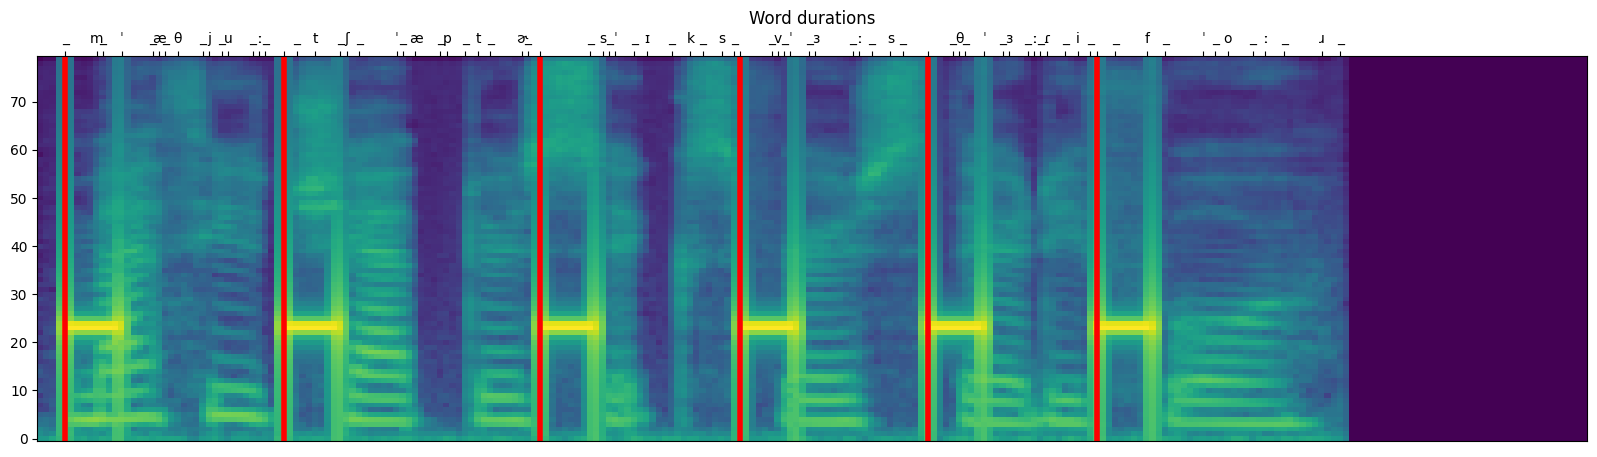

 ---- 
sentence: Matthew chapter 6 verse 34
custom split: ['Matthew', 'chapter', '6', 'verse', '34']
word indices: [0, 15, 31, 43, 55, 69]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 324
Duration: 10.811065759637188
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/hotairballoons_quick_13s.mp4
1
10.811065759637188
13.16
13.16
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/hotairballoons_quick_13s.mp4, start=0, width=1080, height=1920, fps=30, duration=10.811065759637188, reverse_loop=False, speed_factor=1
Running looping command for ./videos/hotairballoons_quick_13s.mp4: ffmpeg -y -i ./videos/hotairballoons_quick_13s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpz8fq9egf.avi


python3(23359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.8333333333333334


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.8333333333333334
Component: 0 - 324
Duration: 10.811065759637188
Current frame: 0, adjusted current frame: 0, total frames: 329
Current frame: 100, adjusted current frame: 83, total frames: 329
Current frame: 200, adjusted current frame: 166, total frames: 329
Current frame: 300, adjusted current frame: 250, total frames: 329
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp896dehv1.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp7pawj57e.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Matthew_chapter_6_verse_34.mp4


python3(23371) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Second Corinthians chapter 12 verse 9 to 10  to  output/mebible/Second_Corinthians_chapter_12_verse_9_to_10.mp4
 > Text splitted to sentences.
['He has said to me, My grace is sufficient for you, for my power is made perfect in weakness.']


python3(23375) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.5721120834350586
 > Real-time factor: 0.41405115815721766
 ---- 
sentence: He has said to me, My grace is sufficient for you, for my power is made perfect in weakness.
split: 19 word indices: 19
sum split: 19 sum word indices: 19
 > Text splitted to sentences.
['Most gladly therefore I will rather glory in my weaknesses, that the power of Christ may rest on me.']


python3(23389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.3701701164245605
 > Real-time factor: 0.22476677677628823
 ---- 
sentence: Most gladly therefore I will rather glory in my weaknesses, that the power of Christ may rest on me.
split: 18 word indices: 18
sum split: 37 sum word indices: 37
 > Text splitted to sentences.
['refore I take pleasure in weaknesses, in injuries, in necessities, in persecutions, and in distresses, for Christs sake.']


python3(23394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.983428955078125
 > Real-time factor: 0.23561874223920706
 ---- 
sentence: refore I take pleasure in weaknesses, in injuries, in necessities, in persecutions, and in distresses, for Christs sake.
split: 18 word indices: 18
sum split: 55 sum word indices: 55
 > Text splitted to sentences.
['For when I am weak, then am I strong.']


python3(23402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23404) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5068659782409668
 > Real-time factor: 0.18812945765239222
 ---- 
sentence: For when I am weak, then am I strong.
split: 8 word indices: 8
sum split: 63 sum word indices: 63
 > Text splitted to sentences.
['Second Corinthians chapter 12 verse 9 to 10']


python3(23410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23411) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.7590150833129883
 > Real-time factor: 0.19927941735391733
 ---- 
sentence: Second Corinthians chapter 12 verse 9 to 10
split: 8 word indices: 8
sum split: 71 sum word indices: 71
Component: 0 - 816
Duration: 27.229024943310655
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/woods_path_23s.mp4
0.8385659560293137
27.22902494331066
22.833333333333332
27.22902494331066
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/woods_path_23s.mp4, start=0, width=1080, height=1920, fps=30, duration=27.22902494331066, reverse_loop=False, speed_factor=0.8385659560293137
Running looping command for ./videos/woods_path_23s.mp4: ffmpeg -y -i ./videos/woods_path_23s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpjdanz11l.avi


python3(23413) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23414) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.670852764823451


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Finished reading frames
Video released
Speed factor: 0.670852764823451
Component: 0 - 816
Duration: 27.22902494331066
Current frame: 0, adjusted current frame: 0, total frames: 548
Current frame: 100, adjusted current frame: 67, total frames: 548
Current frame: 200, adjusted current frame: 134, total frames: 548
Current frame: 300, adjusted current frame: 201, total frames: 548
Current frame: 400, adjusted current frame: 268, total frames: 548
Current frame: 500, adjusted current frame: 335, total frames: 548
Current frame: 600, adjusted current frame: 402, total frames: 548
Current frame: 700, adjusted current frame: 469, total frames: 548
Current frame: 800, adjusted current frame: 536, total frames: 548
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpdnpaizu2.mp4

python3(23449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Ecclesiastes chapter 3 verse 11  to  output/mebible/Ecclesiastes_chapter_3_verse_11.mp4
 > Text splitted to sentences.
['He has made everything beautiful in its time.']


python3(23450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.3021979331970215
 > Real-time factor: 0.45398217219507847
 ---- 
sentence: He has made everything beautiful in its time.
split: 8 word indices: 8
sum split: 8 sum word indices: 8
 > Text splitted to sentences.
['He has also set eternity in their hearts, yet so that man cant find out the work that God has done from the beginning even to the end.']


python3(23457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.1374590396881104
 > Real-time factor: 0.27434904899601165
 ---- 
sentence: He has also set eternity in their hearts, yet so that man cant find out the work that God has done from the beginning even to the end.
split: 27 word indices: 27
sum split: 35 sum word indices: 35
 > Text splitted to sentences.
['Ecclesiastes chapter 3 verse 11']


python3(23469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23470) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23471) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6206798553466797
 > Real-time factor: 0.19869324637622368
 ---- 
sentence: Ecclesiastes chapter 3 verse 11
split: 5 word indices: 5
sum split: 40 sum word indices: 40
Component: 0 - 413
Duration: 13.783219954648526
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/road_loop_20s.mp4
1
13.783219954648526
20.32
20.32
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/road_loop_20s.mp4, start=0, width=1080, height=1920, fps=30, duration=13.783219954648526, reverse_loop=False, speed_factor=1
Running looping command for ./videos/road_loop_20s.mp4: ffmpeg -y -i ./videos/road_loop_20s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpaykvwybu.avi


python3(23472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.8333333333333334


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Finished reading frames
Video released
Speed factor: 0.8333333333333334
Component: 0 - 413
Duration: 13.783219954648526
Current frame: 0, adjusted current frame: 0, total frames: 508
Current frame: 100, adjusted current frame: 83, total frames: 508
Current frame: 200, adjusted current frame: 166, total frames: 508
Current frame: 300, adjusted current frame: 250, total frames: 508
Current frame: 400, adjusted current frame: 333, total frames: 508
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpv8dp4_ij.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpgmteovac.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Ecclesiastes_chapter_3_verse_11.mp4


python3(23476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Ecclesiastes chapter 3 verse 1 to 2  to  output/mebible/Ecclesiastes_chapter_3_verse_1_to_2.mp4
 > Text splitted to sentences.
['For everything there is a season, and a time for every purpose under heaven a time to be born, and a time to die; a time to plant, and a time to pluck up that which is planted.']


python3(23477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.857840061187744
 > Real-time factor: 0.28653771075477336
 ---- 
sentence: For everything there is a season, and a time for every purpose under heaven a time to be born, and a time to die; a time to plant, and a time to pluck up that which is planted.
split: 37 word indices: 37
sum split: 37 sum word indices: 37
 > Text splitted to sentences.
['Ecclesiastes chapter 3 verse 1 to 2']


python3(23484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23488) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23489) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6700451374053955
 > Real-time factor: 0.20755359743466187
 ---- 
sentence: Ecclesiastes chapter 3 verse 1 to 2
split: 7 word indices: 7
sum split: 44 sum word indices: 44
Component: 0 - 396
Duration: 13.201995464852608
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/cross_mountain_14s.mp4
1
13.201995464852608
14.869565217391305
14.869565217391305
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/cross_mountain_14s.mp4, start=0, width=1080, height=1920, fps=30, duration=13.201995464852608, reverse_loop=False, speed_factor=1
Running looping command for ./videos/cross_mountain_14s.mp4: ffmpeg -y -i ./videos/cross_mountain_14s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpawkg480y.avi


python3(23490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 396
Duration: 13.201995464852608
Current frame: 0, adjusted current frame: 0, total frames: 342
Current frame: 100, adjusted current frame: 76, total frames: 342
Current frame: 200, adjusted current frame: 153, total frames: 342
Current frame: 300, adjusted current frame: 230, total frames: 342
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpdpdj1f6m.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmph2fa6wys.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Ecclesiastes_chapter_3_verse_1_to_2.mp4


python3(23492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Psalm 118 verse 14  to  output/mebible/Psalm_118_verse_14.mp4
 > Text splitted to sentences.
['The Lord is my strength and my song; he has become my salvation.']


python3(23493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.9749577045440674
 > Real-time factor: 0.24407149619887245
 ---- 
sentence: The Lord is my strength and my song; he has become my salvation.
split: 13 word indices: 13
sum split: 13 sum word indices: 13
 > Text splitted to sentences.
['Psalm 118 verse 14']


python3(23495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5435290336608887
 > Real-time factor: 0.1857304610746125
 ---- 
sentence: Psalm 118 verse 14
split: 4 word indices: 6
sum split: 17 sum word indices: 19
@@@@@@@@ failed 
split: 4 word indices: 6


python3(23498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

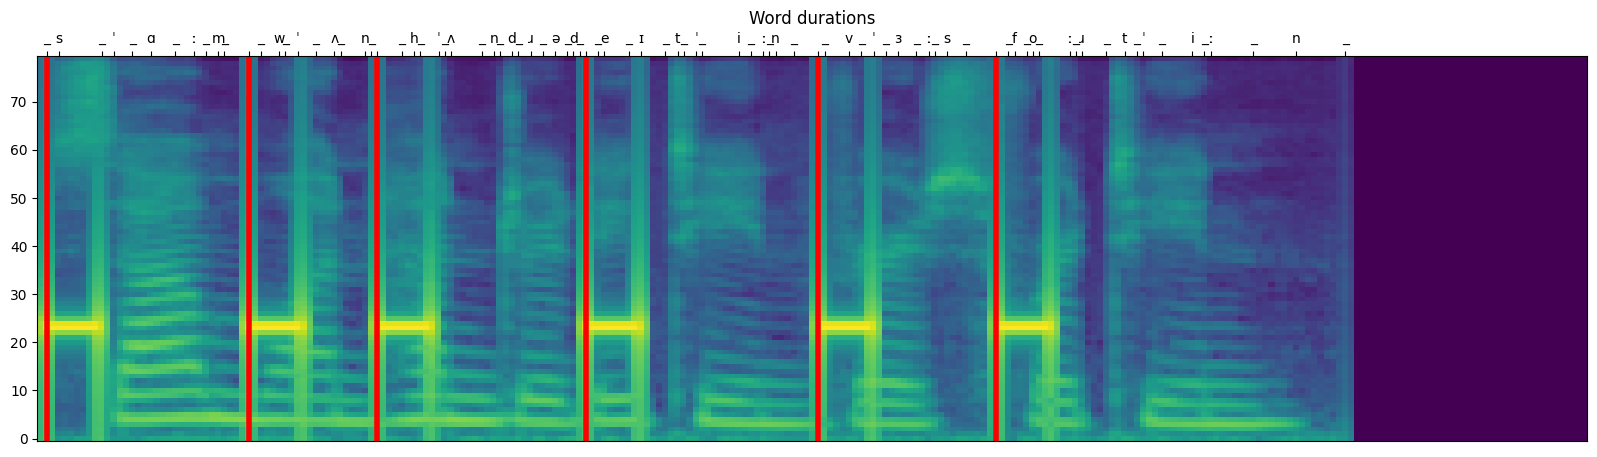

 ---- 
sentence: Psalm 118 verse 14
custom split: ['Psalm', '118', 'verse', '14']
word indices: [0, 11, 21, 39, 55, 67]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 207
Duration: 6.920997732426304
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/sunset_15sec.mp4
1
6.920997732426304
16.0
16.0
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/sunset_15sec.mp4, start=0, width=1080, height=1920, fps=30, duration=6.920997732426304, reverse_loop=False, speed_factor=1
Running looping command for ./videos/sunset_15sec.mp4: ffmpeg -y -i ./videos/sunset_15sec.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmplrquu50u.avi


python3(23499) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.9666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Finished reading frames
Video released
Speed factor: 0.9666666666666667
Component: 0 - 207
Duration: 6.920997732426304
Current frame: 0, adjusted current frame: 0, total frames: 464
Current frame: 100, adjusted current frame: 96, total frames: 464
Current frame: 200, adjusted current frame: 193, total frames: 464
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpg4mpxjqb.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp3del4qro.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Psalm_118_verse_14.mp4


python3(23502) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Mark chapter 12 verse 29 to 31  to  output/mebible/Mark_chapter_12_verse_29_to_31.mp4
 > Text splitted to sentences.
['Jesus answered, The most important is, Hear, O Israel The Lord our God, the Lord is one.']


python3(23503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23504) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23506) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.7698237895965576
 > Real-time factor: 0.3175417797210983
 ---- 
sentence: Jesus answered, The most important is, Hear, O Israel The Lord our God, the Lord is one.
split: 17 word indices: 17
sum split: 17 sum word indices: 17
 > Text splitted to sentences.
['And you shall love the Lord your God with all your heart and with all your soul and with all your mind and with all your strength.']


python3(23508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23509) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23510) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23511) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23512) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23513) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.3740170001983643
 > Real-time factor: 0.21321553635833473
 ---- 
sentence: And you shall love the Lord your God with all your heart and with all your soul and with all your mind and with all your strength.
split: 27 word indices: 27
sum split: 44 sum word indices: 44
 > Text splitted to sentences.
['The second is this You shall love your neighbor as yourself.']


python3(23514) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23515) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.8460109233856201
 > Real-time factor: 0.2342593537855752
 ---- 
sentence: The second is this You shall love your neighbor as yourself.
split: 11 word indices: 11
sum split: 55 sum word indices: 55
 > Text splitted to sentences.
['There is no other commandment greater than these.']


python3(23516) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23517) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.7411489486694336
 > Real-time factor: 0.2426694927263158
 ---- 
sentence: There is no other commandment greater than these.
split: 8 word indices: 8
sum split: 63 sum word indices: 63
 > Text splitted to sentences.
['Mark chapter 12 verse 29 to 31']


python3(23518) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23519) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.643718957901001
 > Real-time factor: 0.18234844580828716
 ---- 
sentence: Mark chapter 12 verse 29 to 31
split: 7 word indices: 9
sum split: 70 sum word indices: 72
@@@@@@@@ failed 
split: 7 word indices: 9


python3(23520) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

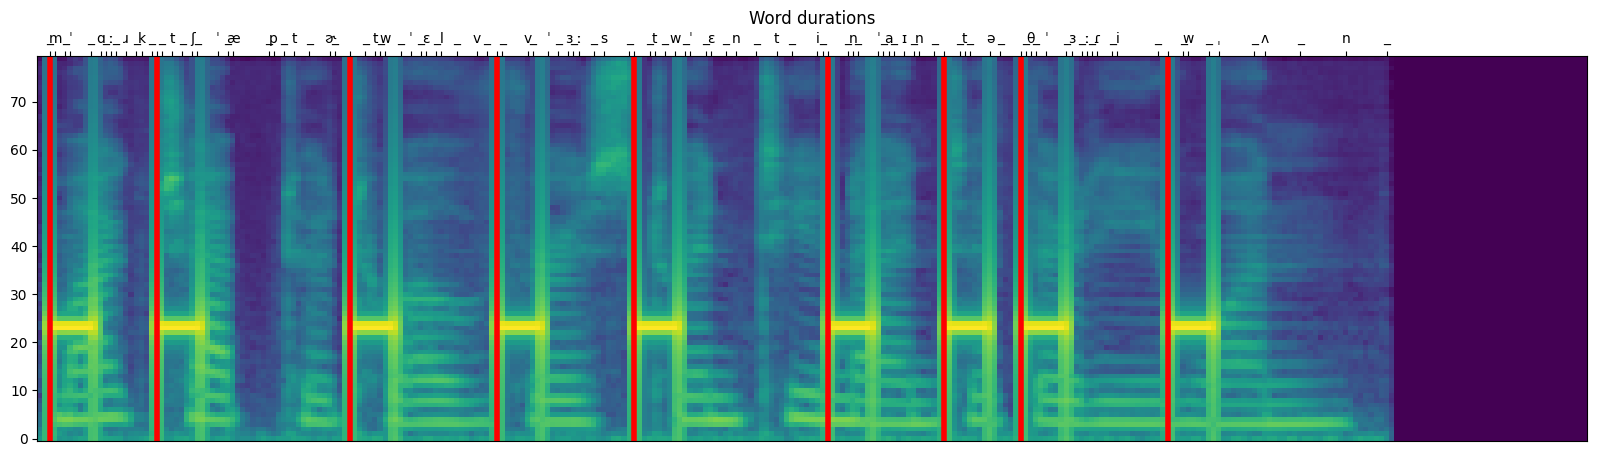

 ---- 
sentence: Mark chapter 12 verse 29 to 31
custom split: ['Mark', 'chapter', '12', 'verse', '29', 'to', '31']
word indices: [0, 13, 29, 43, 55, 71, 83, 89, 103]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 666
Duration: 22.213514739229026
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/mountain_road_24s.mp4
1
22.213514739229026
24.291666666666668
24.291666666666668
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/mountain_road_24s.mp4, start=0, width=1080, height=1920, fps=30, duration=22.213514739229026, reverse_loop=False, speed_factor=1
Running looping command for ./videos/mountain_road_24s.mp4: ffmpeg -y -i ./videos/mountain_road_24s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp5978q_mz.avi


python3(23521) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.8


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Finished reading frames
Video released
Speed factor: 0.8
Component: 0 - 666
Duration: 22.213514739229026
Current frame: 0, adjusted current frame: 0, total frames: 583
Current frame: 100, adjusted current frame: 80, total frames: 583
Current frame: 200, adjusted current frame: 160, total frames: 583
Current frame: 300, adjusted current frame: 240, total frames: 583
Current frame: 400, adjusted current frame: 320, total frames: 583
Current frame: 500, adjusted current frame: 400, total frames: 583
Current frame: 600, adjusted current frame: 480, total frames: 583
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpriwnmjm_.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp8ig3_16m.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Mark_chapter_12_verse

python3(23524) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Ecclesiastes chapter 1 verse 7  to  output/mebible/Ecclesiastes_chapter_1_verse_7.mp4
 > Text splitted to sentences.
['All the rivers run into the sea, yet the sea is not full.']


python3(23525) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23526) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.3371319770812988
 > Real-time factor: 0.33867579597779174
 ---- 
sentence: All the rivers run into the sea, yet the sea is not full.
split: 13 word indices: 13
sum split: 13 sum word indices: 13
 > Text splitted to sentences.
['To the place where the rivers flow, there they flow again.']


python3(23529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23530) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23531) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.7249820232391357
 > Real-time factor: 0.19819794698996906
 ---- 
sentence: To the place where the rivers flow, there they flow again.
split: 11 word indices: 11
sum split: 24 sum word indices: 24
 > Text splitted to sentences.
['Ecclesiastes chapter 1 verse 7']


python3(23533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5397360324859619
 > Real-time factor: 0.18740834461318123
 ---- 
sentence: Ecclesiastes chapter 1 verse 7
split: 5 word indices: 5
sum split: 29 sum word indices: 29
Component: 0 - 314
Duration: 10.485986394557823
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/rocky_coast_13s.mp4
1
10.485986394557823
13.782608695652174
13.782608695652174
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/rocky_coast_13s.mp4, start=0, width=1080, height=1920, fps=30, duration=10.485986394557823, reverse_loop=False, speed_factor=1
Running looping command for ./videos/rocky_coast_13s.mp4: ffmpeg -y -i ./videos/rocky_coast_13s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmptaoaj5uf.avi


python3(23536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 314
Duration: 10.485986394557823
Current frame: 0, adjusted current frame: 0, total frames: 317
Current frame: 100, adjusted current frame: 76, total frames: 317
Current frame: 200, adjusted current frame: 153, total frames: 317
Current frame: 300, adjusted current frame: 230, total frames: 317
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpr4tpop7v.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpkrrbxc_n.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Ecclesiastes_chapter_1_verse_7.mp4


python3(23540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Colossians chapter 1 verse 11  to  output/mebible/Colossians_chapter_1_verse_11.mp4
 > Text splitted to sentences.
['He is the image of the invisible God, the firstborn of all creation.']


python3(23541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23542) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.4461462497711182
 > Real-time factor: 0.321810156703669
 ---- 
sentence: He is the image of the invisible God, the firstborn of all creation.
split: 12 word indices: 12
sum split: 12 sum word indices: 12
 > Text splitted to sentences.
['For by him all things were created in the heavens and on the earth, visible things and invisible things, whether thrones or dominions or principalities or powers.']


python3(23544) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23546) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.9994480609893799
 > Real-time factor: 0.21715575372771606
 ---- 
sentence: For by him all things were created in the heavens and on the earth, visible things and invisible things, whether thrones or dominions or principalities or powers.
split: 25 word indices: 25
sum split: 37 sum word indices: 37
 > Text splitted to sentences.
['All things have been created through him and for him.']


python3(23549) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23550) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6198899745941162
 > Real-time factor: 0.18664755762235447
 ---- 
sentence: All things have been created through him and for him.
split: 9 word indices: 9
sum split: 46 sum word indices: 46
 > Text splitted to sentences.
['Colossians chapter 1 verse 11']


python3(23553) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5950160026550293
 > Real-time factor: 0.1940843618127721
 ---- 
sentence: Colossians chapter 1 verse 11
split: 5 word indices: 5
sum split: 51 sum word indices: 51
Component: 0 - 602
Duration: 20.08816326530612
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/mountains_fog_68s.mp4
1
20.08816326530612
68.04
68.04
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/mountains_fog_68s.mp4, start=0, width=1080, height=1920, fps=30, duration=20.08816326530612, reverse_loop=False, speed_factor=1
Running looping command for ./videos/mountains_fog_68s.mp4: ffmpeg -y -i ./videos/mountains_fog_68s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpldp87nny.avi


python3(23556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.8333333333333334


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Reading frame 600
Reading frame 700
Reading frame 800
Reading frame 900
Reading frame 1000
Reading frame 1100
Reading frame 1200
Reading frame 1300
Reading frame 1400
Reading frame 1500
Reading frame 1600
Reading frame 1700
Finished reading frames
Video released
Speed factor: 0.8333333333333334
Component: 0 - 602
Duration: 20.08816326530612
Current frame: 0, adjusted current frame: 0, total frames: 1701
Current frame: 100, adjusted current frame: 83, total frames: 1701
Current frame: 200, adjusted current frame: 166, total frames: 1701
Current frame: 300, adjusted current frame: 250, total frames: 1701
Current frame: 400, adjusted current frame: 333, total frames: 1701
Current frame: 500, adjusted current frame: 416, total frames: 1701
Current frame: 600, adjusted current frame: 500, total frames: 1701
Runn

python3(23618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  First Corinthians chapter 10 verse 13  to  output/mebible/First_Corinthians_chapter_10_verse_13.mp4
 > Text splitted to sentences.
['No temptation has taken you except what is common to man.']


python3(23622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.554582118988037
 > Real-time factor: 0.3814150761492591
 ---- 
sentence: No temptation has taken you except what is common to man.
split: 11 word indices: 11
sum split: 11 sum word indices: 11
 > Text splitted to sentences.
['God is faithful, who will not allow you to be tempted above what you are able, but will with the temptation also make the way of escape, that you may be able to endure it.']


python3(23626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23630) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.24849009513855
 > Real-time factor: 0.22756116709721774
 ---- 
sentence: God is faithful, who will not allow you to be tempted above what you are able, but will with the temptation also make the way of escape, that you may be able to endure it.
split: 33 word indices: 33
sum split: 44 sum word indices: 44
 > Text splitted to sentences.
['First Corinthians chapter 10 verse 13']


python3(23643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6322250366210938
 > Real-time factor: 0.19102940771616858
 ---- 
sentence: First Corinthians chapter 10 verse 13
split: 6 word indices: 6
sum split: 50 sum word indices: 50
Component: 0 - 517
Duration: 17.266213151927438
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/mountains_drone_35sec.mp4
1
17.266213151927438
36.08695652173913
36.08695652173913
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/mountains_drone_35sec.mp4, start=0, width=1080, height=1920, fps=30, duration=17.266213151927438, reverse_loop=False, speed_factor=1
Running looping command for ./videos/mountains_drone_35sec.mp4: ffmpeg -y -i ./videos/mountains_drone_35sec.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpen08ia3m.avi


python3(23648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Reading frame 600
Reading frame 700
Reading frame 800
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 517
Duration: 17.266213151927438
Current frame: 0, adjusted current frame: 0, total frames: 830
Current frame: 100, adjusted current frame: 76, total frames: 830
Current frame: 200, adjusted current frame: 153, total frames: 830
Current frame: 300, adjusted current frame: 230, total frames: 830
Current frame: 400, adjusted current frame: 306, total frames: 830
Current frame: 500, adjusted current frame: 383, total frames: 830
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp54tvmu2c.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpv1w35uy0.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Firs

python3(23741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Psalm 30 verse 11  to  output/mebible/Psalm_30_verse_11.mp4
 > Text splitted to sentences.
['You have turned my mourning into dancing for me.']


python3(23747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.4255471229553223
 > Real-time factor: 0.491022776511573
 ---- 
sentence: You have turned my mourning into dancing for me.
split: 9 word indices: 9
sum split: 9 sum word indices: 9
 > Text splitted to sentences.
['You have removed my sackcloth, and clothed me with gladness.']


python3(23758) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.8367717266082764
 > Real-time factor: 0.208870863200875
 ---- 
sentence: You have removed my sackcloth, and clothed me with gladness.
split: 10 word indices: 10
sum split: 19 sum word indices: 19
 > Text splitted to sentences.
['Psalm 30 verse 11']


python3(23761) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23763) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.4247300624847412
 > Real-time factor: 0.19452679207769494
 ---- 
sentence: Psalm 30 verse 11
split: 4 word indices: 4
sum split: 23 sum word indices: 23
Component: 0 - 272
Duration: 9.092789115646259
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/bright_monastery_15s.mp4
1
9.092789115646259
15.73913043478261
15.73913043478261
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/bright_monastery_15s.mp4, start=0, width=1080, height=1920, fps=30, duration=9.092789115646259, reverse_loop=False, speed_factor=1
Running looping command for ./videos/bright_monastery_15s.mp4: ffmpeg -y -i ./videos/bright_monastery_15s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpqg28j47d.avi


python3(23764) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23765) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 272
Duration: 9.092789115646259
Current frame: 0, adjusted current frame: 0, total frames: 362
Current frame: 100, adjusted current frame: 76, total frames: 362
Current frame: 200, adjusted current frame: 153, total frames: 362
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpia2sqpsi.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpv_k5l0h8.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Psalm_30_verse_11.mp4


python3(23777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Psalm 46 verse 1 to 3  to  output/mebible/Psalm_46_verse_1_to_3.mp4
 > Text splitted to sentences.
['God is our refuge and strength, a very present help in trouble.']


python3(23778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23779) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.2929389476776123
 > Real-time factor: 0.3255676022781307
 ---- 
sentence: God is our refuge and strength, a very present help in trouble.
split: 12 word indices: 12
sum split: 12 sum word indices: 12
 > Text splitted to sentences.
['Therefore we wont be afraid, though the earth changes, though the mountains are shaken into the heart of the seas; though its waters roar and are troubled, though the mountains tremble with their swelling.']


python3(23780) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23781) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23782) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.536173105239868
 > Real-time factor: 0.23977248821147654
 ---- 
sentence: Therefore we wont be afraid, though the earth changes, though the mountains are shaken into the heart of the seas; though its waters roar and are troubled, though the mountains tremble with their swelling.
split: 33 word indices: 33
sum split: 45 sum word indices: 45
 > Text splitted to sentences.
['Psalm 46 verse 1 to 3']


python3(23789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23792) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23794) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5504748821258545
 > Real-time factor: 0.18960839713314004
 ---- 
sentence: Psalm 46 verse 1 to 3
split: 6 word indices: 7
sum split: 51 sum word indices: 52
@@@@@@@@ failed 
split: 6 word indices: 7


python3(23795) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

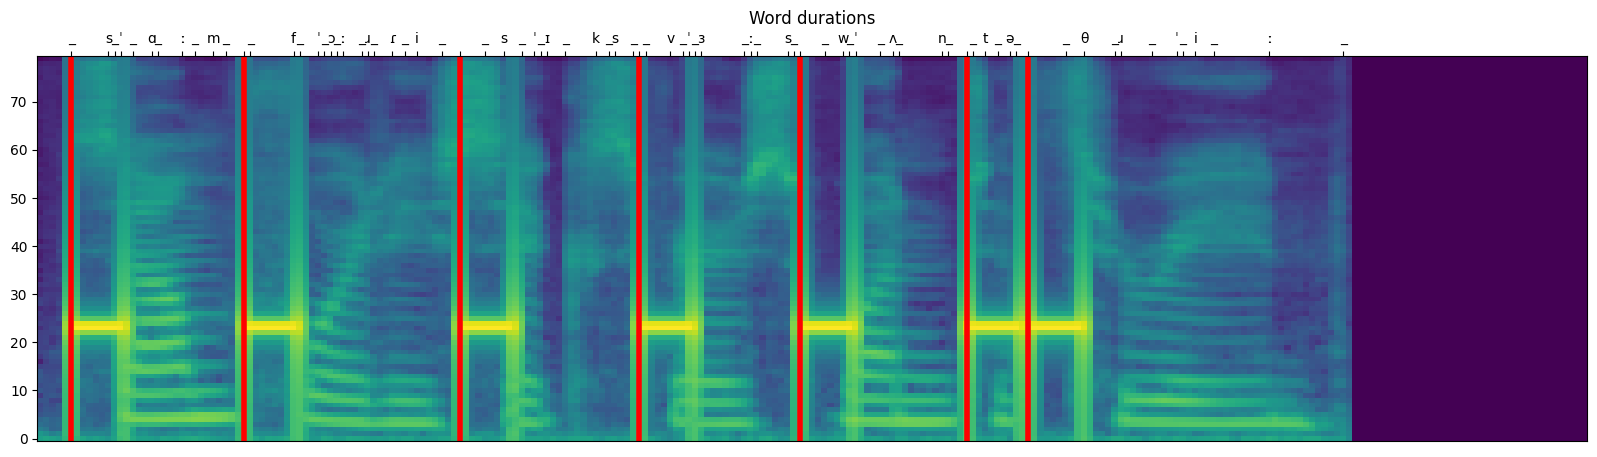

 ---- 
sentence: Psalm 46 verse 1 to 3
custom split: ['Psalm', '46', 'verse', '1', 'to', '3']
word indices: [0, 11, 27, 39, 51, 61, 67]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 523
Duration: 17.451972789115647
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/sunset_ocean_drone_20sec.mp4
1
17.451972789115647
20.434782608695652
20.434782608695652
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/sunset_ocean_drone_20sec.mp4, start=0, width=1080, height=1920, fps=30, duration=17.451972789115647, reverse_loop=False, speed_factor=1
Running looping command for ./videos/sunset_ocean_drone_20sec.mp4: ffmpeg -y -i ./videos/sunset_ocean_drone_20sec.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp27d1swcf.avi


python3(23796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 523
Duration: 17.451972789115647
Current frame: 0, adjusted current frame: 0, total frames: 470
Current frame: 100, adjusted current frame: 76, total frames: 470
Current frame: 200, adjusted current frame: 153, total frames: 470
Current frame: 300, adjusted current frame: 230, total frames: 470
Current frame: 400, adjusted current frame: 306, total frames: 470
Current frame: 500, adjusted current frame: 383, total frames: 470
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp07usl5er.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp2it1v2vn.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Psalm_46_verse_1_to_3.mp4


python3(23867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Ecclesiastes chapter 4 verse 8  to  output/mebible/Ecclesiastes_chapter_4_verse_8.mp4
 > Text splitted to sentences.
['There is one who is alone, and he has neither son nor brother.']


python3(23870) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.4284460544586182
 > Real-time factor: 0.35656171324049685
 ---- 
sentence: There is one who is alone, and he has neither son nor brother.
split: 13 word indices: 13
sum split: 13 sum word indices: 13
 > Text splitted to sentences.
['There is no end to all of his labor, neither are his eyes satisfied with wealth.']


python3(23875) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23876) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23877) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.1120269298553467
 > Real-time factor: 0.21864918143913536
 ---- 
sentence: There is no end to all of his labor, neither are his eyes satisfied with wealth.
split: 16 word indices: 16
sum split: 29 sum word indices: 29
 > Text splitted to sentences.
['For whom then do I labor and deprive my soul of enjoyment?']


python3(23884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.7499668598175049
 > Real-time factor: 0.1888448892172481
 ---- 
sentence: For whom then do I labor and deprive my soul of enjoyment?
split: 12 word indices: 12
sum split: 41 sum word indices: 41
 > Text splitted to sentences.
['This also is vanity.']


python3(23887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.3919391632080078
 > Real-time factor: 0.19734788428791952
 ---- 
sentence: This also is vanity.
split: 4 word indices: 4
sum split: 45 sum word indices: 45
 > Text splitted to sentences.
['Yes, it is a miserable business.']


python3(23889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.506584882736206
 > Real-time factor: 0.18721836726222418
 ---- 
sentence: Yes, it is a miserable business.
split: 6 word indices: 6
sum split: 51 sum word indices: 51
 > Text splitted to sentences.
['Ecclesiastes chapter 4 verse 8']


python3(23892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23894) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6030621528625488
 > Real-time factor: 0.18953136360631703
 ---- 
sentence: Ecclesiastes chapter 4 verse 8
split: 5 word indices: 5
sum split: 56 sum word indices: 56
Component: 0 - 628
Duration: 20.937142857142856
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/road_loop_20s.mp4
0.9705240174672489
20.937142857142856
20.32
20.937142857142856
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/road_loop_20s.mp4, start=0, width=1080, height=1920, fps=30, duration=20.937142857142856, reverse_loop=False, speed_factor=0.9705240174672489
Running looping command for ./videos/road_loop_20s.mp4: ffmpeg -y -i ./videos/road_loop_20s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp27xj1jpv.avi


python3(23895) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23896) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.8087700145560408


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Finished reading frames
Video released
Speed factor: 0.8087700145560408
Component: 0 - 628
Duration: 20.937142857142856
Current frame: 0, adjusted current frame: 0, total frames: 508
Current frame: 100, adjusted current frame: 80, total frames: 508
Current frame: 200, adjusted current frame: 161, total frames: 508
Current frame: 300, adjusted current frame: 242, total frames: 508
Current frame: 400, adjusted current frame: 323, total frames: 508
Current frame: 500, adjusted current frame: 404, total frames: 508
Current frame: 600, adjusted current frame: 485, total frames: 508
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp699qc795.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp4t9dajae.wav -c:v copy -c:a aac -strict experimental -loglevel error output

python3(23986) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Galatians chapter 5 verse 22 to 23  to  output/mebible/Galatians_chapter_5_verse_22_to_23.mp4
 > Text splitted to sentences.
['But the fruit of the Spirit is love, joy, peace, patience, kindness, goodness, faith, gentleness, and selfcontrol.']


python3(23991) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23992) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23993) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23994) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23995) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23996) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(23999) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.465993881225586
 > Real-time factor: 0.30082746017208206
 ---- 
sentence: But the fruit of the Spirit is love, joy, peace, patience, kindness, goodness, faith, gentleness, and selfcontrol.
split: 16 word indices: 16
sum split: 16 sum word indices: 16
 > Text splitted to sentences.
['Against such things there is no law.']


python3(24005) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24006) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24007) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24008) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24009) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24011) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24012) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24013) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24014) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5823969841003418
 > Real-time factor: 0.21340490393865555
 ---- 
sentence: Against such things there is no law.
split: 7 word indices: 7
sum split: 23 sum word indices: 23
 > Text splitted to sentences.
['Galatians chapter 5 verse 22 to 23']


python3(24018) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24019) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.7988460063934326
 > Real-time factor: 0.1965559101162202
 ---- 
sentence: Galatians chapter 5 verse 22 to 23
split: 7 word indices: 9
sum split: 30 sum word indices: 32
@@@@@@@@ failed 
split: 7 word indices: 9


python3(24022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

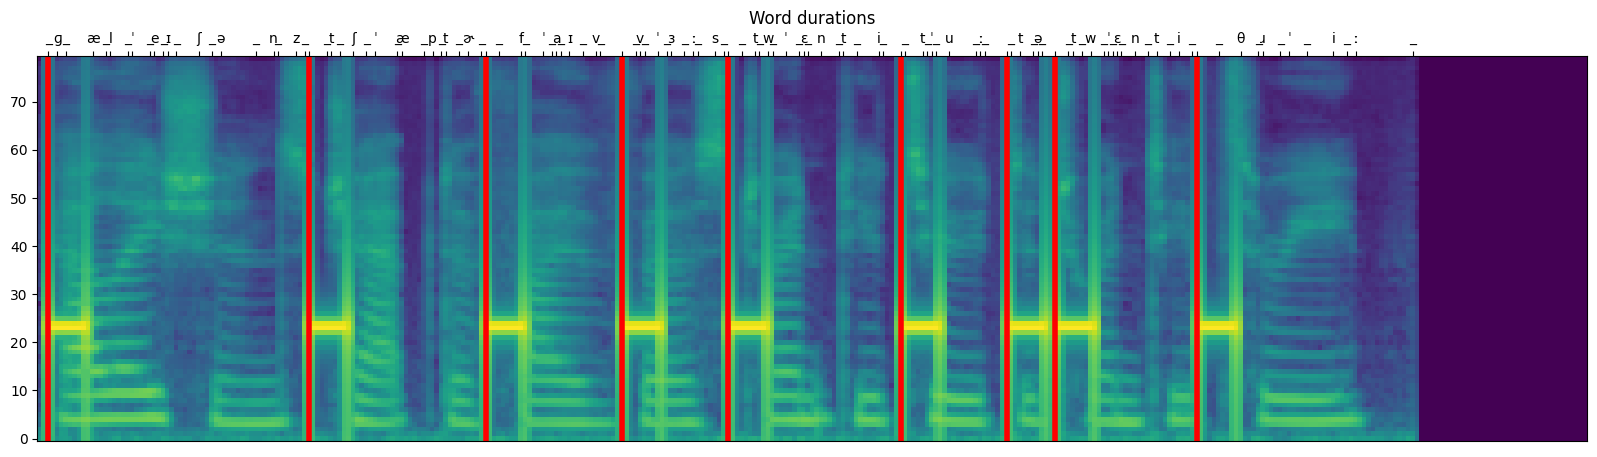

 ---- 
sentence: Galatians chapter 5 verse 22 to 23
custom split: ['Galatians', 'chapter', '5', 'verse', '22', 'to', '23']
word indices: [0, 21, 37, 49, 61, 77, 87, 93, 109]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 449
Duration: 14.990657596371882
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/hotairballoons_quick_13s.mp4
0.8778801006825112
14.990657596371882
13.16
14.990657596371882
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/hotairballoons_quick_13s.mp4, start=0, width=1080, height=1920, fps=30, duration=14.990657596371882, reverse_loop=False, speed_factor=0.8778801006825112
Running looping command for ./videos/hotairballoons_quick_13s.mp4: ffmpeg -y -i ./videos/hotairballoons_quick_13s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp8mjcc04a.avi


python3(24023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.7315667505687594


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.7315667505687594
Component: 0 - 449
Duration: 14.990657596371882
Current frame: 0, adjusted current frame: 0, total frames: 329
Current frame: 100, adjusted current frame: 73, total frames: 329
Current frame: 200, adjusted current frame: 146, total frames: 329
Current frame: 300, adjusted current frame: 219, total frames: 329
Current frame: 400, adjusted current frame: 292, total frames: 329
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpjn4f2yur.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp5ze273yv.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Galatians_chapter_5_verse_22_to_23.mp4


python3(24042) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  John chapter 16 verse 22  to  output/mebible/John_chapter_16_verse_22.mp4
 > Text splitted to sentences.
['Therefore you now have sorrow, but I will see you again, and your heart will rejoice, and no one will take your joy away from you.']


python3(24043) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.155172109603882
 > Real-time factor: 0.2932270276974874
 ---- 
sentence: Therefore you now have sorrow, but I will see you again, and your heart will rejoice, and no one will take your joy away from you.
split: 25 word indices: 25
sum split: 25 sum word indices: 25
 > Text splitted to sentences.
['John chapter 16 verse 22']


python3(24050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24054) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.7464091777801514
 > Real-time factor: 0.2303796524363429
 ---- 
sentence: John chapter 16 verse 22
split: 5 word indices: 6
sum split: 30 sum word indices: 31
@@@@@@@@ failed 
split: 5 word indices: 6


python3(24055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

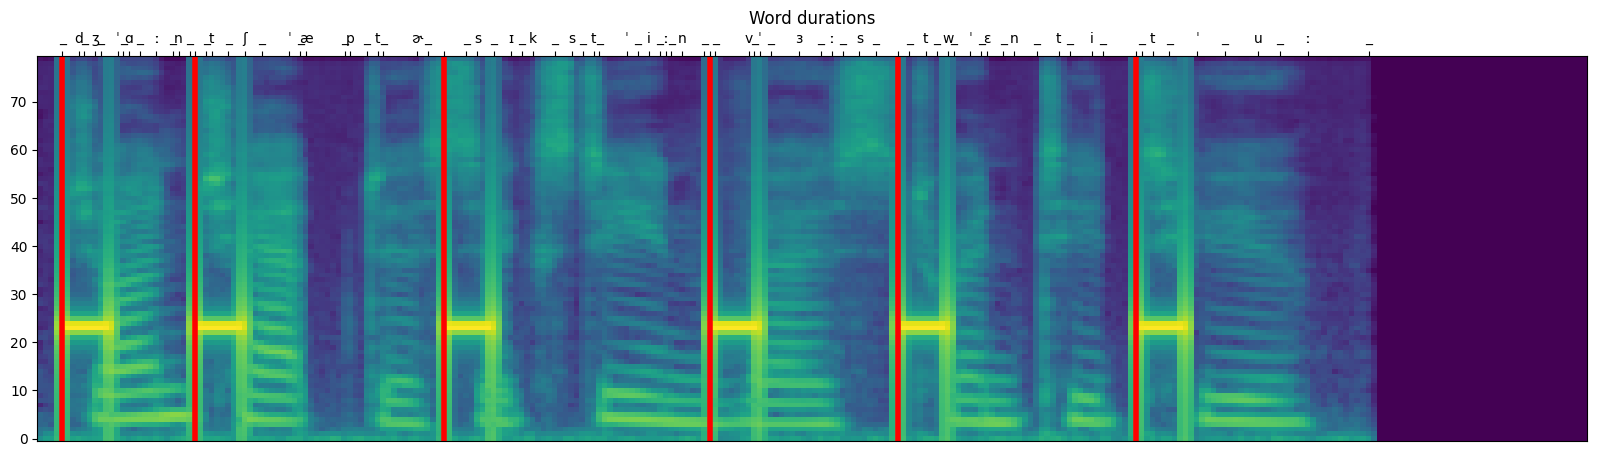

 ---- 
sentence: John chapter 16 verse 22
custom split: ['John', 'chapter', '16', 'verse', '22']
word indices: [0, 13, 29, 49, 61, 77]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 317
Duration: 10.589750566893425
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/beach_sunrise_26s.mp4
1
10.589750566893425
27.391304347826086
27.391304347826086
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/beach_sunrise_26s.mp4, start=0, width=1080, height=1920, fps=30, duration=10.589750566893425, reverse_loop=False, speed_factor=1
Running looping command for ./videos/beach_sunrise_26s.mp4: ffmpeg -y -i ./videos/beach_sunrise_26s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmptx2j2ds4.avi


python3(24056) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Reading frame 600
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 317
Duration: 10.589750566893425
Current frame: 0, adjusted current frame: 0, total frames: 630
Current frame: 100, adjusted current frame: 76, total frames: 630
Current frame: 200, adjusted current frame: 153, total frames: 630
Current frame: 300, adjusted current frame: 230, total frames: 630
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp52q8nidi.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpco4j8rbg.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/John_chapter_16_verse_22.mp4


python3(24094) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Ecclesiastes chapter 7 verse 12  to  output/mebible/Ecclesiastes_chapter_7_verse_12.mp4
 > Text splitted to sentences.
['For wisdom is a defense, even as money is a defense; but the excellency of knowledge is that wisdom preserves the life of him who has it.']


python3(24095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24096) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24097) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.4308600425720215
 > Real-time factor: 0.28561931930851453
 ---- 
sentence: For wisdom is a defense, even as money is a defense; but the excellency of knowledge is that wisdom preserves the life of him who has it.
split: 27 word indices: 27
sum split: 27 sum word indices: 27
 > Text splitted to sentences.
['Ecclesiastes chapter 7 verse 12']


python3(24105) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24106) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5511260032653809
 > Real-time factor: 0.18253317069216607
 ---- 
sentence: Ecclesiastes chapter 7 verse 12
split: 5 word indices: 5
sum split: 32 sum word indices: 32
Component: 0 - 345
Duration: 11.53015873015873
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/cross_mountain_14s.mp4
1
11.53015873015873
14.869565217391305
14.869565217391305
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/cross_mountain_14s.mp4, start=0, width=1080, height=1920, fps=30, duration=11.53015873015873, reverse_loop=False, speed_factor=1
Running looping command for ./videos/cross_mountain_14s.mp4: ffmpeg -y -i ./videos/cross_mountain_14s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpxrkj4km3.avi


python3(24109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 345
Duration: 11.53015873015873
Current frame: 0, adjusted current frame: 0, total frames: 342
Current frame: 100, adjusted current frame: 76, total frames: 342
Current frame: 200, adjusted current frame: 153, total frames: 342
Current frame: 300, adjusted current frame: 230, total frames: 342
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpmk2qki3t.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpr2l9vyg5.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Ecclesiastes_chapter_7_verse_12.mp4


python3(24121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Psalm 118 verse 24  to  output/mebible/Psalm_118_verse_24.mp4
 > Text splitted to sentences.
['This is the day that Yahweh has made.']


python3(24122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.9835631847381592
 > Real-time factor: 0.36349504263000154
 ---- 
sentence: This is the day that Yahweh has made.
split: 8 word indices: 8
sum split: 8 sum word indices: 8
 > Text splitted to sentences.
['We will rejoice and be glad in it!']


python3(24123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5073599815368652
 > Real-time factor: 0.2051057420227317
 ---- 
sentence: We will rejoice and be glad in it!
split: 8 word indices: 8
sum split: 16 sum word indices: 16
 > Text splitted to sentences.
['Psalm 118 verse 24']


python3(24125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6700890064239502
 > Real-time factor: 0.2039007312824037
 ---- 
sentence: Psalm 118 verse 24
split: 4 word indices: 7
sum split: 20 sum word indices: 23
@@@@@@@@ failed 
split: 4 word indices: 7


python3(24129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

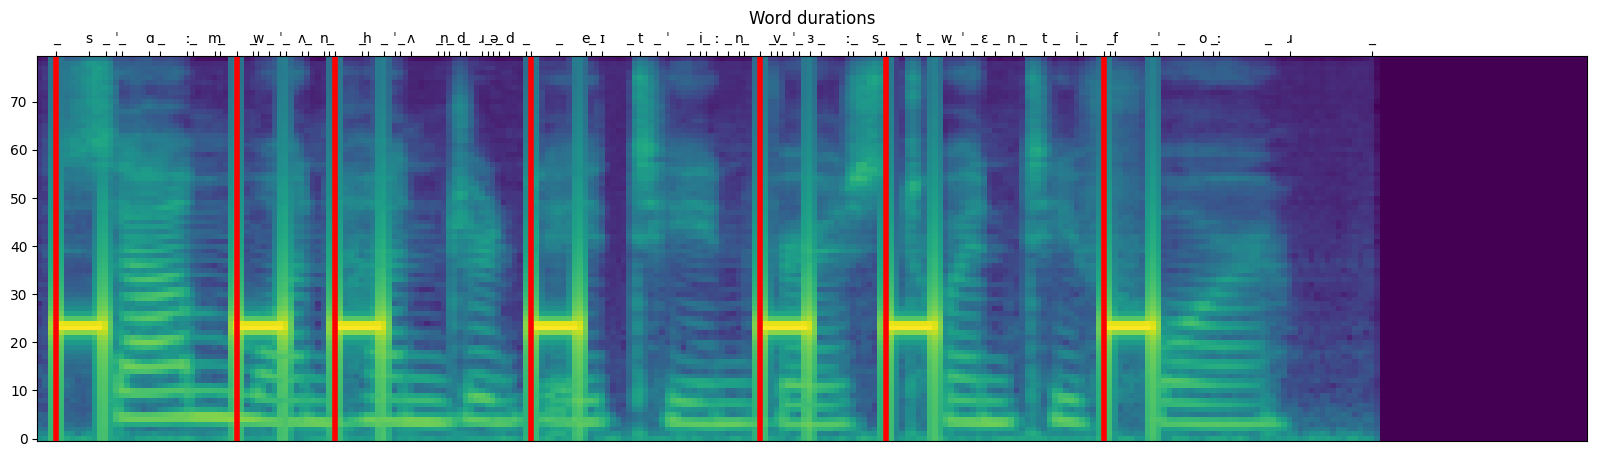

 ---- 
sentence: Psalm 118 verse 24
custom split: ['Psalm', '118', 'verse', '24']
word indices: [0, 11, 21, 39, 55, 67, 83]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 253
Duration: 8.465850340136054
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/sunset_15sec.mp4
1
8.465850340136054
16.0
16.0
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/sunset_15sec.mp4, start=0, width=1080, height=1920, fps=30, duration=8.465850340136054, reverse_loop=False, speed_factor=1
Running looping command for ./videos/sunset_15sec.mp4: ffmpeg -y -i ./videos/sunset_15sec.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpwcio975v.avi


python3(24130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.9666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Finished reading frames
Video released
Speed factor: 0.9666666666666667
Component: 0 - 253
Duration: 8.465850340136054
Current frame: 0, adjusted current frame: 0, total frames: 464
Current frame: 100, adjusted current frame: 96, total frames: 464
Current frame: 200, adjusted current frame: 193, total frames: 464
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpxmnvxntj.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpgnjie7ue.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Psalm_118_verse_24.mp4


python3(24172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  First Thessalonians chapter 5 verse 16 to 18  to  output/mebible/First_Thessalonians_chapter_5_verse_16_to_18.mp4
 > Text splitted to sentences.
['Always rejoice.']


python3(24173) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.8718960285186768
 > Real-time factor: 0.44159563186413137
 ---- 
sentence: Always rejoice.
split: 2 word indices: 2
sum split: 2 sum word indices: 2
 > Text splitted to sentences.
['Pray without ceasing.']


python3(24174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24175) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.4072709083557129
 > Real-time factor: 0.22053839708358225
 ---- 
sentence: Pray without ceasing.
split: 3 word indices: 3
sum split: 5 sum word indices: 5
 > Text splitted to sentences.
['In everything give thanks, for this is the will of God in Christ Jesus toward you.']


python3(24176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.9442780017852783
 > Real-time factor: 0.20958819797235248
 ---- 
sentence: In everything give thanks, for this is the will of God in Christ Jesus toward you.
split: 16 word indices: 16
sum split: 21 sum word indices: 21
 > Text splitted to sentences.
['First Thessalonians chapter 5 verse 16 to 18']


python3(24179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.8664467334747314
 > Real-time factor: 0.2066941153833935
 ---- 
sentence: First Thessalonians chapter 5 verse 16 to 18
split: 8 word indices: 8
sum split: 29 sum word indices: 29
Component: 0 - 375
Duration: 12.518458049886622
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/sunset_15sec.mp4
1
12.518458049886622
16.0
16.0
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/sunset_15sec.mp4, start=0, width=1080, height=1920, fps=30, duration=12.518458049886622, reverse_loop=False, speed_factor=1
Running looping command for ./videos/sunset_15sec.mp4: ffmpeg -y -i ./videos/sunset_15sec.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpuq60txqz.avi


python3(24184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.9666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Finished reading frames
Video released
Speed factor: 0.9666666666666667
Component: 0 - 375
Duration: 12.518458049886622
Current frame: 0, adjusted current frame: 0, total frames: 464
Current frame: 100, adjusted current frame: 96, total frames: 464
Current frame: 200, adjusted current frame: 193, total frames: 464
Current frame: 300, adjusted current frame: 290, total frames: 464
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmph18lsg_2.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp2_faijsl.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/First_Thessalonians_chapter_5_verse_16_to_18.mp4


python3(24214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Romans chapter 15 verse 13  to  output/mebible/Romans_chapter_15_verse_13.mp4
 > Text splitted to sentences.
['Now may the God of hope fill you with all joy and peace in believing, that you may abound in hope in the power of the Holy Spirit.']


python3(24215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.1331279277801514
 > Real-time factor: 0.29679120903301576
 ---- 
sentence: Now may the God of hope fill you with all joy and peace in believing, that you may abound in hope in the power of the Holy Spirit.
split: 26 word indices: 26
sum split: 26 sum word indices: 26
 > Text splitted to sentences.
['Romans chapter 15 verse 13']


python3(24225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6018209457397461
 > Real-time factor: 0.20164952366826833
 ---- 
sentence: Romans chapter 15 verse 13
split: 5 word indices: 5
sum split: 31 sum word indices: 31
Component: 0 - 305
Duration: 10.171791383219954
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/sunset_ocean_drone_20sec.mp4
1
10.171791383219954
20.434782608695652
20.434782608695652
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/sunset_ocean_drone_20sec.mp4, start=0, width=1080, height=1920, fps=30, duration=10.171791383219954, reverse_loop=False, speed_factor=1
Running looping command for ./videos/sunset_ocean_drone_20sec.mp4: ffmpeg -y -i ./videos/sunset_ocean_drone_20sec.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpa8hobyil.avi


python3(24229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 305
Duration: 10.171791383219954
Current frame: 0, adjusted current frame: 0, total frames: 470
Current frame: 100, adjusted current frame: 76, total frames: 470
Current frame: 200, adjusted current frame: 153, total frames: 470
Current frame: 300, adjusted current frame: 230, total frames: 470
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpaurog13_.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpn0hqv9fb.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Romans_chapter_15_verse_13.mp4


python3(24279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Ecclesiastes chapter 9 verse 12  to  output/mebible/Ecclesiastes_chapter_9_verse_12.mp4
 > Text splitted to sentences.
['For man also doesnt know his time.']


python3(24280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.1269199848175049
 > Real-time factor: 0.45133292765958266
 ---- 
sentence: For man also doesnt know his time.
split: 7 word indices: 7
sum split: 7 sum word indices: 7
 > Text splitted to sentences.
['As the fish that are taken in an evil net, and as the birds that are caught in the snare, even so are the sons of men snared in an evil time, when it falls suddenly on them.']


python3(24285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.911530017852783
 > Real-time factor: 0.3107296759740856
 ---- 
sentence: As the fish that are taken in an evil net, and as the birds that are caught in the snare, even so are the sons of men snared in an evil time, when it falls suddenly on them.
split: 37 word indices: 37
sum split: 44 sum word indices: 44
 > Text splitted to sentences.
['Ecclesiastes chapter 9 verse 12']


python3(24295) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24296) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24297) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24298) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24299) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5869591236114502
 > Real-time factor: 0.19515151802823397
 ---- 
sentence: Ecclesiastes chapter 9 verse 12
split: 5 word indices: 5
sum split: 49 sum word indices: 49
Component: 0 - 446
Duration: 14.874557823129251
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/mountains_igloos_26s.mp4
1
14.874557823129251
27.0
27.0
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/mountains_igloos_26s.mp4, start=0, width=1080, height=1920, fps=30, duration=14.874557823129251, reverse_loop=False, speed_factor=1
Running looping command for ./videos/mountains_igloos_26s.mp4: ffmpeg -y -i ./videos/mountains_igloos_26s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpta5e0h8a.avi


python3(24300) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24301) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Reading frame 600
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 446
Duration: 14.874557823129251
Current frame: 0, adjusted current frame: 0, total frames: 621
Current frame: 100, adjusted current frame: 76, total frames: 621
Current frame: 200, adjusted current frame: 153, total frames: 621
Current frame: 300, adjusted current frame: 230, total frames: 621
Current frame: 400, adjusted current frame: 306, total frames: 621
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmppnko58s9.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmplujwesmm.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Ecclesiastes_chapter_9_verse_12.mp4


python3(24342) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Isaiah chapter 55 verse 12  to  output/mebible/Isaiah_chapter_55_verse_12.mp4
 > Text splitted to sentences.
['For you shall go out with joy, and be led out with peace.']


python3(24343) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24344) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.315760850906372
 > Real-time factor: 0.3655075433693497
 ---- 
sentence: For you shall go out with joy, and be led out with peace.
split: 13 word indices: 13
sum split: 13 sum word indices: 13
 > Text splitted to sentences.
['The mountains and the hills will break out before you into singing; and all the trees of the fields will clap their hands.']


python3(24352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24357) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.4747838973999023
 > Real-time factor: 0.22440505229151378
 ---- 
sentence: The mountains and the hills will break out before you into singing; and all the trees of the fields will clap their hands.
split: 22 word indices: 22
sum split: 35 sum word indices: 35
 > Text splitted to sentences.
['Isaiah chapter 55 verse 12']


python3(24362) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24363) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5877671241760254
 > Real-time factor: 0.1931830593859015
 ---- 
sentence: Isaiah chapter 55 verse 12
split: 5 word indices: 6
sum split: 40 sum word indices: 41
@@@@@@@@ failed 
split: 5 word indices: 6


python3(24365) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

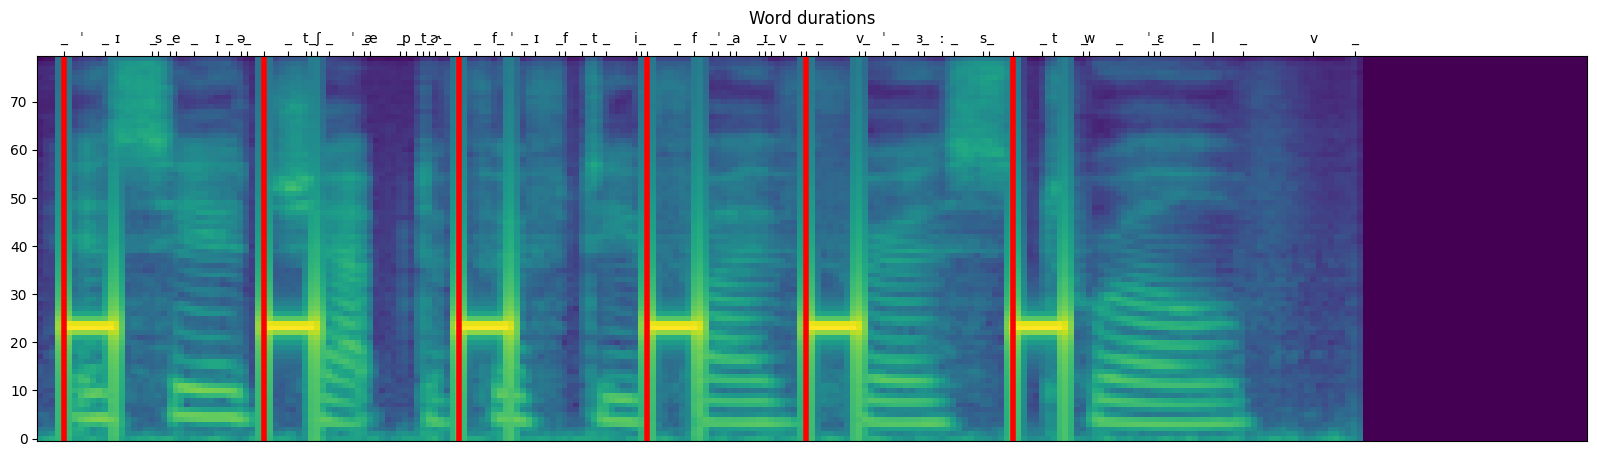

 ---- 
sentence: Isaiah chapter 55 verse 12
custom split: ['Isaiah', 'chapter', '55', 'verse', '12']
word indices: [0, 13, 29, 43, 55, 67]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 396
Duration: 13.214331065759637
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/woods_path_23s.mp4
1
13.214331065759637
22.833333333333332
22.833333333333332
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/woods_path_23s.mp4, start=0, width=1080, height=1920, fps=30, duration=13.214331065759637, reverse_loop=False, speed_factor=1
Running looping command for ./videos/woods_path_23s.mp4: ffmpeg -y -i ./videos/woods_path_23s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp5e094ovr.avi


python3(24367) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.8


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Finished reading frames
Video released
Speed factor: 0.8
Component: 0 - 396
Duration: 13.214331065759637
Current frame: 0, adjusted current frame: 0, total frames: 548
Current frame: 100, adjusted current frame: 80, total frames: 548
Current frame: 200, adjusted current frame: 160, total frames: 548
Current frame: 300, adjusted current frame: 240, total frames: 548
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpf5nde33s.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp7e66a167.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Isaiah_chapter_55_verse_12.mp4


python3(24377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Matthew chapter 11 verse 28  to  output/mebible/Matthew_chapter_11_verse_28.mp4
 > Text splitted to sentences.
['Come to me, all you who labor and are heavily burdened, and I will give you rest.']


python3(24378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.8394341468811035
 > Real-time factor: 0.35360164369793845
 ---- 
sentence: Come to me, all you who labor and are heavily burdened, and I will give you rest.
split: 17 word indices: 17
sum split: 17 sum word indices: 17
 > Text splitted to sentences.
['Matthew chapter 11 verse 28']


python3(24383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24384) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24385) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.6270260810852051
 > Real-time factor: 0.207671309299579
 ---- 
sentence: Matthew chapter 11 verse 28
split: 5 word indices: 6
sum split: 22 sum word indices: 23
@@@@@@@@ failed 
split: 5 word indices: 6


python3(24387) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

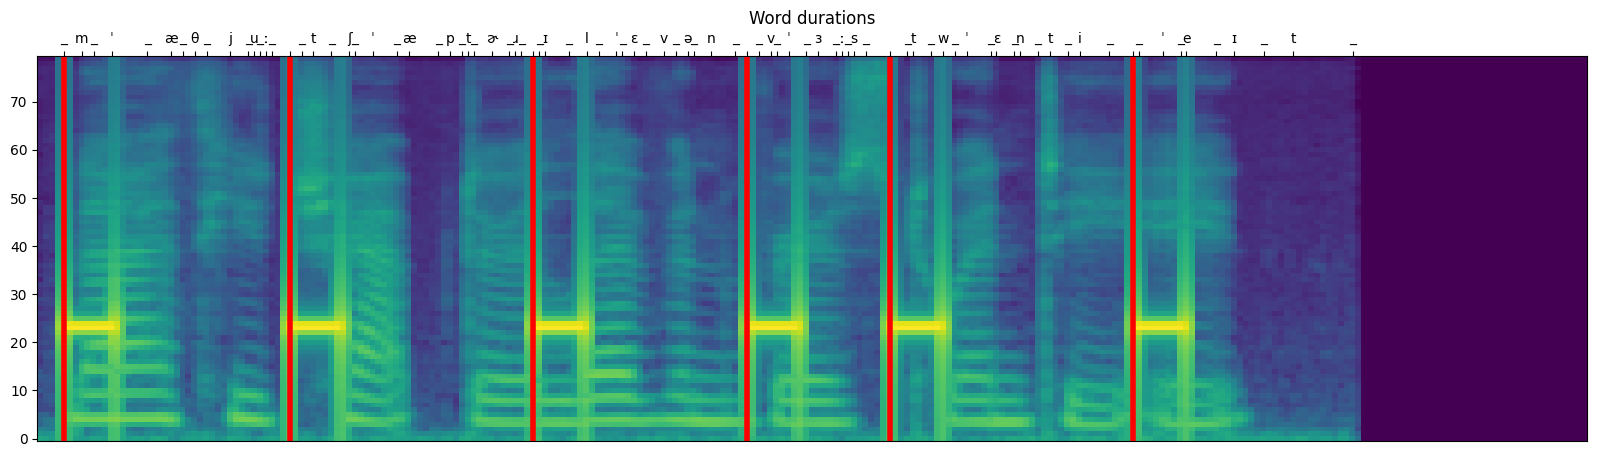

 ---- 
sentence: Matthew chapter 11 verse 28
custom split: ['Matthew', 'chapter', '11', 'verse', '28']
word indices: [0, 15, 33, 49, 61, 77]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 246
Duration: 8.221315192743765
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/beach_sunrise_26s.mp4
1
8.221315192743765
27.391304347826086
27.391304347826086
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/beach_sunrise_26s.mp4, start=0, width=1080, height=1920, fps=30, duration=8.221315192743765, reverse_loop=False, speed_factor=1
Running looping command for ./videos/beach_sunrise_26s.mp4: ffmpeg -y -i ./videos/beach_sunrise_26s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpel_z0yu6.avi


python3(24388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Reading frame 600
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 246
Duration: 8.221315192743765
Current frame: 0, adjusted current frame: 0, total frames: 630
Current frame: 100, adjusted current frame: 76, total frames: 630
Current frame: 200, adjusted current frame: 153, total frames: 630
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpxoq7tmko.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpyqn_mj2s.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Matthew_chapter_11_verse_28.mp4


python3(24389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Psalm 130 verse 5  to  output/mebible/Psalm_130_verse_5.mp4
 > Text splitted to sentences.
['I wait for Yahweh.']


python3(24390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.12074613571167
 > Real-time factor: 0.6795108967345557
 ---- 
sentence: I wait for Yahweh.
split: 4 word indices: 4
sum split: 4 sum word indices: 4
 > Text splitted to sentences.
['My soul waits.']


python3(24391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.4003012180328369
 > Real-time factor: 0.2127516838031251
 ---- 
sentence: My soul waits.
split: 3 word indices: 3
sum split: 7 sum word indices: 7
 > Text splitted to sentences.
['I hope in his word.']


python3(24395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.3244040012359619
 > Real-time factor: 0.1825517616183381
 ---- 
sentence: I hope in his word.
split: 5 word indices: 5
sum split: 12 sum word indices: 12
 > Text splitted to sentences.
['My soul longs for the Lord more than watchmen long for the morning, more than watchmen for the morning.']


python3(24397) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24398) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.1427781581878662
 > Real-time factor: 0.20589503846942778
 ---- 
sentence: My soul longs for the Lord more than watchmen long for the morning, more than watchmen for the morning.
split: 16 word indices: 16
sum split: 28 sum word indices: 28
 > Text splitted to sentences.
['Psalm 130 verse 5']


python3(24400) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24401) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.535059928894043
 > Real-time factor: 0.20296709730445997
 ---- 
sentence: Psalm 130 verse 5
split: 4 word indices: 6
sum split: 32 sum word indices: 34
@@@@@@@@ failed 
split: 4 word indices: 6


python3(24403) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

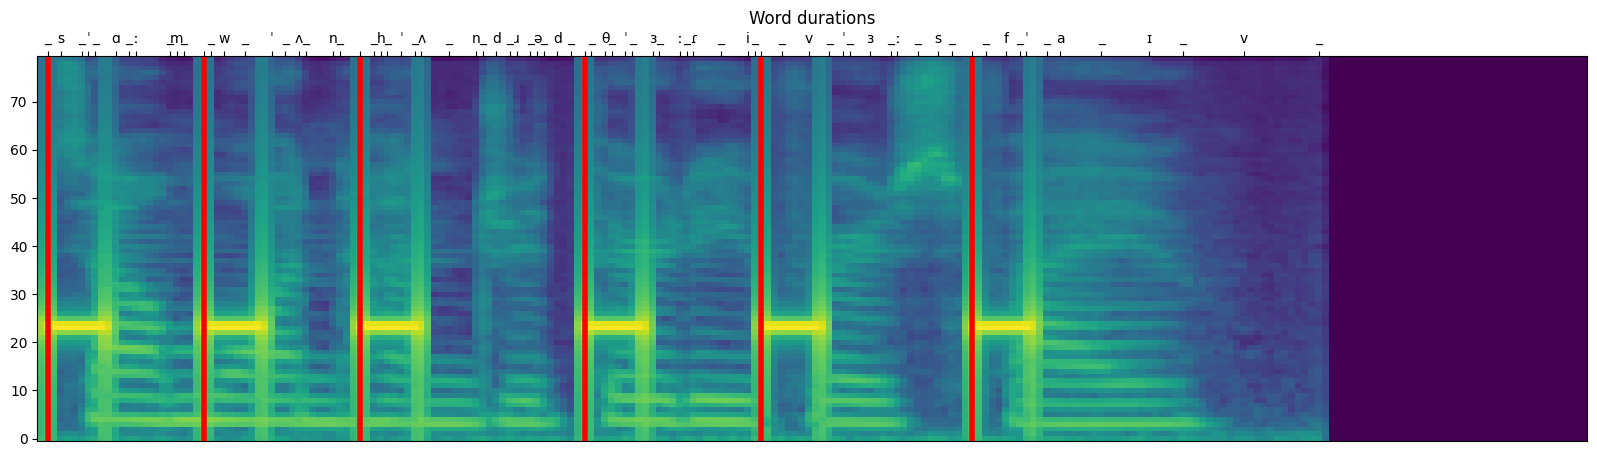

 ---- 
sentence: Psalm 130 verse 5
custom split: ['Psalm', '130', 'verse', '5']
word indices: [0, 11, 21, 39, 53, 65]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 404
Duration: 13.494421768707484
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/cross_mountain_14s.mp4
1
13.494421768707484
14.869565217391305
14.869565217391305
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/cross_mountain_14s.mp4, start=0, width=1080, height=1920, fps=30, duration=13.494421768707484, reverse_loop=False, speed_factor=1
Running looping command for ./videos/cross_mountain_14s.mp4: ffmpeg -y -i ./videos/cross_mountain_14s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpk19vy0ut.avi


python3(24405) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 404
Duration: 13.494421768707484
Current frame: 0, adjusted current frame: 0, total frames: 342
Current frame: 100, adjusted current frame: 76, total frames: 342
Current frame: 200, adjusted current frame: 153, total frames: 342
Current frame: 300, adjusted current frame: 230, total frames: 342
Current frame: 400, adjusted current frame: 306, total frames: 342
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpyqj8fx4m.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpmc2ryp5b.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Psalm_130_verse_5.mp4


python3(24418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Ecclesiastes chapter 4 verse 6  to  output/mebible/Ecclesiastes_chapter_4_verse_6.mp4
 > Text splitted to sentences.
['Better is a handful, with quietness, than two handfuls with labor and chasing after wind.']


python3(24419) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24420) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.7349951267242432
 > Real-time factor: 0.29183939448515167
 ---- 
sentence: Better is a handful, with quietness, than two handfuls with labor and chasing after wind.
split: 15 word indices: 15
sum split: 15 sum word indices: 15
 > Text splitted to sentences.
['Ecclesiastes chapter 4 verse 6']


python3(24424) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24425) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24427) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5802168846130371
 > Real-time factor: 0.19441074498111885
 ---- 
sentence: Ecclesiastes chapter 4 verse 6
split: 5 word indices: 5
sum split: 20 sum word indices: 20
Component: 0 - 267
Duration: 8.92952380952381
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/monastery_15s.mp4
1
8.92952380952381
15.130434782608695
15.130434782608695
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/monastery_15s.mp4, start=0, width=1080, height=1920, fps=30, duration=8.92952380952381, reverse_loop=False, speed_factor=1
Running looping command for ./videos/monastery_15s.mp4: ffmpeg -y -i ./videos/monastery_15s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpwyxplc7x.avi


python3(24428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 267
Duration: 8.92952380952381
Current frame: 0, adjusted current frame: 0, total frames: 348
Current frame: 100, adjusted current frame: 76, total frames: 348
Current frame: 200, adjusted current frame: 153, total frames: 348
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpzih3p2ka.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpq9rfse1_.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Ecclesiastes_chapter_4_verse_6.mp4


python3(24430) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  First Corinthians chapter 13 verse 4 to 7  to  output/mebible/First_Corinthians_chapter_13_verse_4_to_7.mp4
 > Text splitted to sentences.
['Love is patient and is kind.']


python3(24431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.2726531028747559
 > Real-time factor: 0.5293918072439701
 ---- 
sentence: Love is patient and is kind.
split: 6 word indices: 6
sum split: 6 sum word indices: 6
 > Text splitted to sentences.
['Love doesnt envy.']


python3(24432) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24433) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.43578004837036133
 > Real-time factor: 0.21942249877983347
 ---- 
sentence: Love doesnt envy.
split: 3 word indices: 3
sum split: 9 sum word indices: 9
 > Text splitted to sentences.
['Love doesnt brag, is not proud, doesnt behave itself inappropriately, doesnt seek its own way, is not provoked, takes no account of evil; doesnt rejoice in unrighteousness, but rejoices with the truth; bears all things, believes all things, hopes all things, and endures all things.']


python3(24434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24439) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24441) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24

 > Processing time: 3.93619704246521
 > Real-time factor: 0.22451767514371787
 ---- 
sentence: Love doesnt brag, is not proud, doesnt behave itself inappropriately, doesnt seek its own way, is not provoked, takes no account of evil; doesnt rejoice in unrighteousness, but rejoices with the truth; bears all things, believes all things, hopes all things, and endures all things.
split: 44 word indices: 44
sum split: 53 sum word indices: 53
 > Text splitted to sentences.
['First Corinthians chapter 13 verse 4 to 7']


python3(24447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24448) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24450) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24452) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24453) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24454) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24455) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24456) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24

 > Processing time: 0.7394988536834717
 > Real-time factor: 0.19239604639088811
 ---- 
sentence: First Corinthians chapter 13 verse 4 to 7
split: 8 word indices: 8
sum split: 61 sum word indices: 61
Component: 0 - 772
Duration: 25.76544217687075
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/mountain_road_24s.mp4
0.9428003020446096
25.76544217687075
24.291666666666668
25.76544217687075
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/mountain_road_24s.mp4, start=0, width=1080, height=1920, fps=30, duration=25.76544217687075, reverse_loop=False, speed_factor=0.9428003020446096
Running looping command for ./videos/mountain_road_24s.mp4: ffmpeg -y -i ./videos/mountain_road_24s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp9kyasccb.avi


python3(24460) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24461) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7542402416356877


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Finished reading frames
Video released
Speed factor: 0.7542402416356877
Component: 0 - 772
Duration: 25.76544217687075
Current frame: 0, adjusted current frame: 0, total frames: 583
Current frame: 100, adjusted current frame: 75, total frames: 583
Current frame: 200, adjusted current frame: 150, total frames: 583
Current frame: 300, adjusted current frame: 226, total frames: 583
Current frame: 400, adjusted current frame: 301, total frames: 583
Current frame: 500, adjusted current frame: 377, total frames: 583
Current frame: 600, adjusted current frame: 452, total frames: 583
Current frame: 700, adjusted current frame: 527, total frames: 583
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpt4my8e_n.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpeeoy00p3.

python3(24467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  First John chapter 3 verse 1  to  output/mebible/First_John_chapter_3_verse_1.mp4
 > Text splitted to sentences.
['See how great a love the Father has given to us, that we should be called children of God!']


python3(24468) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24469) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.6843209266662598
 > Real-time factor: 0.2997036510086429
 ---- 
sentence: See how great a love the Father has given to us, that we should be called children of God!
split: 19 word indices: 19
sum split: 19 sum word indices: 19
 > Text splitted to sentences.
['For this cause the world doesnt know us, because it didnt know him.']


python3(24472) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24473) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24474) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24475) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.7574989795684814
 > Real-time factor: 0.20708753842844943
 ---- 
sentence: For this cause the world doesnt know us, because it didnt know him.
split: 13 word indices: 13
sum split: 32 sum word indices: 32
 > Text splitted to sentences.
['First John chapter 3 verse 1']


python3(24476) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24477) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5447578430175781
 > Real-time factor: 0.19464464672247858
 ---- 
sentence: First John chapter 3 verse 1
split: 6 word indices: 6
sum split: 38 sum word indices: 38
Component: 0 - 362
Duration: 12.07655328798186
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/bright_monastery_15s.mp4
1
12.07655328798186
15.73913043478261
15.73913043478261
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/bright_monastery_15s.mp4, start=0, width=1080, height=1920, fps=30, duration=12.07655328798186, reverse_loop=False, speed_factor=1
Running looping command for ./videos/bright_monastery_15s.mp4: ffmpeg -y -i ./videos/bright_monastery_15s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpjhrnz9_v.avi


python3(24479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 362
Duration: 12.07655328798186
Current frame: 0, adjusted current frame: 0, total frames: 362
Current frame: 100, adjusted current frame: 76, total frames: 362
Current frame: 200, adjusted current frame: 153, total frames: 362
Current frame: 300, adjusted current frame: 230, total frames: 362
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmplafh80j9.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpr391ecj5.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/First_John_chapter_3_verse_1.mp4


python3(24481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  John chapter 13 verse 34 to 35  to  output/mebible/John_chapter_13_verse_34_to_35.mp4
 > Text splitted to sentences.
['A new commandment I give to you, that you love one another.']


python3(24482) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24483) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.1266169548034668
 > Real-time factor: 0.318094445982079
 ---- 
sentence: A new commandment I give to you, that you love one another.
split: 12 word indices: 12
sum split: 12 sum word indices: 12
 > Text splitted to sentences.
['Just as I have loved you, you also love one another.']


python3(24484) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24485) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24486) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.777583122253418
 > Real-time factor: 0.200487696979512
 ---- 
sentence: Just as I have loved you, you also love one another.
split: 11 word indices: 11
sum split: 23 sum word indices: 23
 > Text splitted to sentences.
['By this everyone will know that you are my disciples, if you have love for one another.']


python3(24490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.1083471775054932
 > Real-time factor: 0.2300016494503475
 ---- 
sentence: By this everyone will know that you are my disciples, if you have love for one another.
split: 17 word indices: 17
sum split: 40 sum word indices: 40
 > Text splitted to sentences.
['John chapter 13 verse 34 to 35']


python3(24494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.7465381622314453
 > Real-time factor: 0.19540795913109413
 ---- 
sentence: John chapter 13 verse 34 to 35
split: 7 word indices: 9
sum split: 47 sum word indices: 49
@@@@@@@@ failed 
split: 7 word indices: 9


python3(24497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

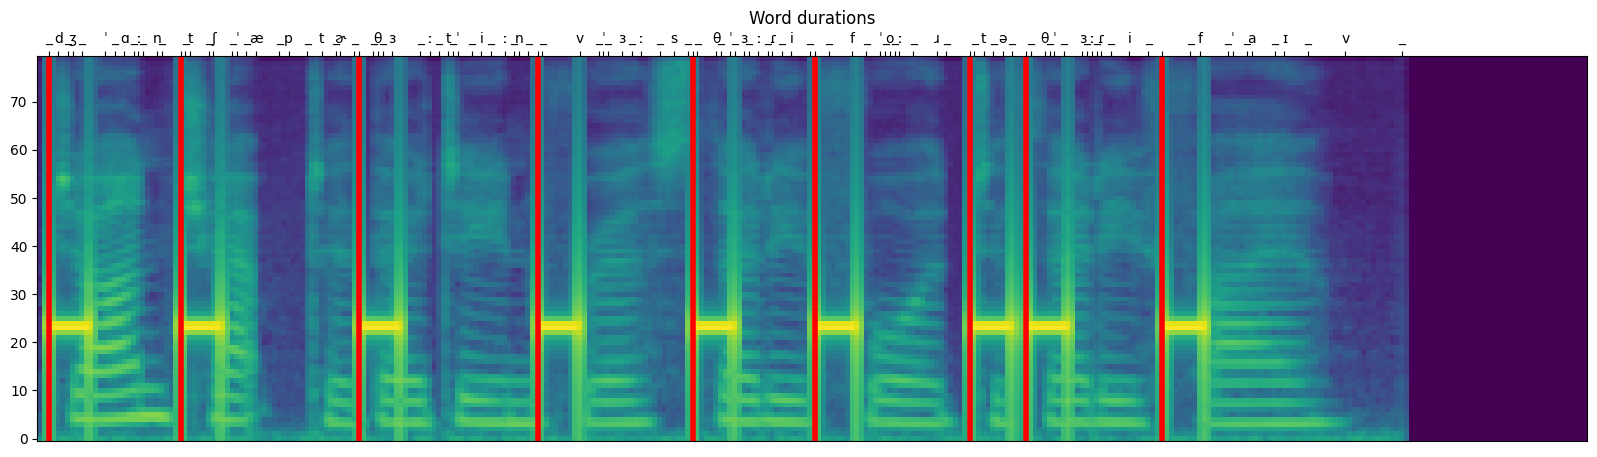

 ---- 
sentence: John chapter 13 verse 34 to 35
custom split: ['John', 'chapter', '13', 'verse', '34', 'to', '35']
word indices: [0, 13, 29, 47, 59, 73, 85, 91, 105]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 481
Duration: 16.05950113378685
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/beach_sunrise_26s.mp4
1
16.05950113378685
27.391304347826086
27.391304347826086
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/beach_sunrise_26s.mp4, start=0, width=1080, height=1920, fps=30, duration=16.05950113378685, reverse_loop=False, speed_factor=1
Running looping command for ./videos/beach_sunrise_26s.mp4: ffmpeg -y -i ./videos/beach_sunrise_26s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp8x0lzzbm.avi


python3(24498) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Reading frame 600
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 481
Duration: 16.05950113378685
Current frame: 0, adjusted current frame: 0, total frames: 630
Current frame: 100, adjusted current frame: 76, total frames: 630
Current frame: 200, adjusted current frame: 153, total frames: 630
Current frame: 300, adjusted current frame: 230, total frames: 630
Current frame: 400, adjusted current frame: 306, total frames: 630
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp0wgbv87d.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpgtm0wzi4.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/John_chapter_13_verse_34_to_35.mp4


python3(24608) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Acts chapter 17 verse 28  to  output/mebible/Acts_chapter_17_verse_28.mp4
 > Text splitted to sentences.
['For in him we live, move, and have our being.']


python3(24609) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.2259068489074707
 > Real-time factor: 0.4075881486491214
 ---- 
sentence: For in him we live, move, and have our being.
split: 10 word indices: 10
sum split: 10 sum word indices: 10
 > Text splitted to sentences.
['As some of your own poets have said, For we are also his offspring.']


python3(24617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24619) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24621) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24622) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.074021339416504
 > Real-time factor: 0.22614754138783338
 ---- 
sentence: As some of your own poets have said, For we are also his offspring.
split: 14 word indices: 14
sum split: 24 sum word indices: 24
 > Text splitted to sentences.
['Acts chapter 17 verse 28']


python3(24625) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24626) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24627) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.830125093460083
 > Real-time factor: 0.25621862137170814
 ---- 
sentence: Acts chapter 17 verse 28
split: 5 word indices: 6
sum split: 29 sum word indices: 30
@@@@@@@@ failed 
split: 5 word indices: 6


python3(24628) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 640x480 with 0 Axes>

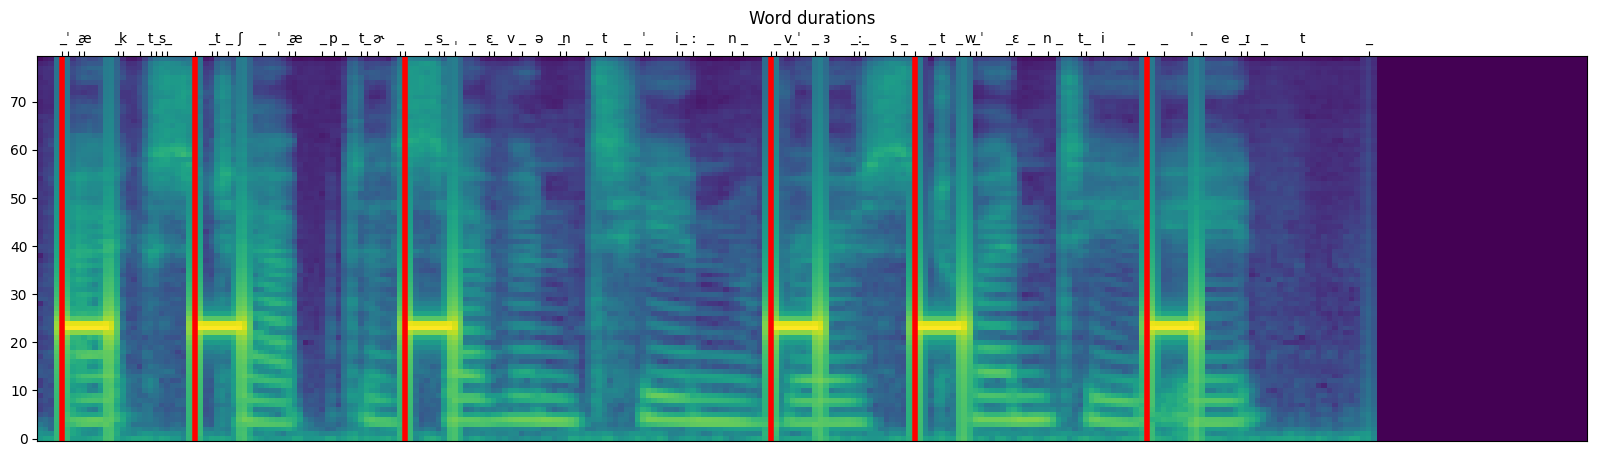

 ---- 
sentence: Acts chapter 17 verse 28
custom split: ['Acts', 'chapter', '17', 'verse', '28']
word indices: [0, 11, 27, 51, 63, 79]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 329
Duration: 10.996825396825397
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/hotairballoons_quick_13s.mp4
1
10.996825396825397
13.16
13.16
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/hotairballoons_quick_13s.mp4, start=0, width=1080, height=1920, fps=30, duration=10.996825396825397, reverse_loop=False, speed_factor=1
Running looping command for ./videos/hotairballoons_quick_13s.mp4: ffmpeg -y -i ./videos/hotairballoons_quick_13s.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmp1skm5wee.avi


python3(24629) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-

Finished running ffmpeg command


Updated Speed factor: 0.8333333333333334


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Finished reading frames
Video released
Speed factor: 0.8333333333333334
Component: 0 - 329
Duration: 10.996825396825397
Current frame: 0, adjusted current frame: 0, total frames: 329
Current frame: 100, adjusted current frame: 83, total frames: 329
Current frame: 200, adjusted current frame: 166, total frames: 329
Current frame: 300, adjusted current frame: 250, total frames: 329
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpd842j81f.mp4 -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpsg3goeos.wav -c:v copy -c:a aac -strict experimental -loglevel error output/mebible/Acts_chapter_17_verse_28.mp4


python3(24635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Writing  Psalm 1 verse 1 to 3  to  output/mebible/Psalm_1_verse_1_to_3.mp4
 > Text splitted to sentences.
['Blessed is the man who doesnt walk in the counsel of the wicked, nor stand on the path of sinners, nor sit in the seat of scoffers; but his delight is in Yahwehs law.']


python3(24636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24637) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24638) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24639) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 2.5635008811950684
 > Real-time factor: 0.2685945907319207
 ---- 
sentence: Blessed is the man who doesnt walk in the counsel of the wicked, nor stand on the path of sinners, nor sit in the seat of scoffers; but his delight is in Yahwehs law.
split: 30 word indices: 30
sum split: 30 sum word indices: 30
 > Text splitted to sentences.
['On his law he meditates day and night.']


python3(24643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24644) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24645) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.5696887969970703
 > Real-time factor: 0.20525552244747386
 ---- 
sentence: On his law he meditates day and night.
split: 8 word indices: 8
sum split: 38 sum word indices: 38
 > Text splitted to sentences.
['He will be like a tree planted by the streams of water, that produces its fruit in its season, whose leaf also does not wither.']


python3(24648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 1.6967408657073975
 > Real-time factor: 0.22691130573051985
 ---- 
sentence: He will be like a tree planted by the streams of water, that produces its fruit in its season, whose leaf also does not wither.
split: 24 word indices: 24
sum split: 62 sum word indices: 62
 > Text splitted to sentences.
['Whatever he does shall prosper.']


python3(24652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.4773399829864502
 > Real-time factor: 0.21186285476753677
 ---- 
sentence: Whatever he does shall prosper.
split: 5 word indices: 5
sum split: 67 sum word indices: 67
 > Text splitted to sentences.
['Psalm 1 verse 1 to 3']


python3(24656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


 > Processing time: 0.4470560550689697
 > Real-time factor: 0.2138490544574536
 ---- 
sentence: Psalm 1 verse 1 to 3
split: 6 word indices: 6
sum split: 73 sum word indices: 73
Component: 0 - 724
Duration: 24.14077097505669
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/mountains_drone_35sec.mp4
1
24.14077097505669
36.08695652173913
36.08695652173913
@@@@@@@@@@@@@@$$$$$$$$$$
Initializing LoopingMP4 with mp4_path=./videos/mountains_drone_35sec.mp4, start=0, width=1080, height=1920, fps=30, duration=24.14077097505669, reverse_loop=False, speed_factor=1
Running looping command for ./videos/mountains_drone_35sec.mp4: ffmpeg -y -i ./videos/mountains_drone_35sec.mp4 -vcodec libx264 -pix_fmt bgr24 /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpgu2j5ifk.avi


python3(24658) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3(24659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --

Finished running ffmpeg command


Updated Speed factor: 0.7666666666666667


Video captured
Reading frame 100
Reading frame 200
Reading frame 300
Reading frame 400
Reading frame 500
Reading frame 600
Reading frame 700
Reading frame 800
Finished reading frames
Video released
Speed factor: 0.7666666666666667
Component: 0 - 724
Duration: 24.14077097505669
Current frame: 0, adjusted current frame: 0, total frames: 830
Current frame: 100, adjusted current frame: 76, total frames: 830
Current frame: 200, adjusted current frame: 153, total frames: 830
Current frame: 300, adjusted current frame: 230, total frames: 830
Current frame: 400, adjusted current frame: 306, total frames: 830
Current frame: 500, adjusted current frame: 383, total frames: 830
Current frame: 600, adjusted current frame: 460, total frames: 830
Current frame: 700, adjusted current frame: 536, total frames: 830
Running composer command: ffmpeg -y -i /var/folders/pn/39tn7gfn1yb353q8p4krv52m0000gn/T/tmpxuwc4kbc.mp4 -i /var/fo

python3(24757) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [6]:
import csv
import os
import re

def generate_videos_from_csv(csv_path):
    # Step 1: Preprocess and clean the csv
    with open(csv_path, 'r') as csvfile, open(csv_path + '.tmp', 'w', newline='') as outfile:
        csvreader = csv.reader(csvfile)
        csvwriter = csv.writer(outfile)
        header = next(csvreader)
        csvwriter.writerow(header)
        
        # Regex pattern for allowed characters in "location" and "verse"
        pattern = re.compile(r"[^a-zA-Z0-9 .,!;?]+")

        # Flag to check if any video is missing
        any_video_missing = False

        for row in csvreader:
            location, verse, video_idea = row
            
            # Clean "location" and "verse" and write to temp csv
            removed_location_chars = pattern.findall(location)
            removed_verse_chars = pattern.findall(verse)
            
            if removed_location_chars:
                print(f"Removed characters {removed_location_chars} from location '{location}'")
                location = pattern.sub('', location)
            if removed_verse_chars:
                print(f"Removed characters {removed_verse_chars} from verse '{verse}'")
                verse = pattern.sub('', verse)
            
            csvwriter.writerow([location, verse, video_idea])
            
            # Step 2: Check if video exists
            video_path = "./videos/" + video_idea
            if not os.path.exists(video_path):
                print(f"{video_idea} for {location} does not exist. Check for typos.")
                any_video_missing = True

    os.remove(csv_path)
    os.rename(csv_path + '.tmp', csv_path)

    # If any video is missing, do not proceed further
    if any_video_missing:
        return

    # Existing functionality to generate videos
    with open(csv_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        for row in csvreader:
            try:
                location, verse, video_idea = row
                output_file = f"output/mebible/{location.replace(' ', '_').replace(':', 'v')}.mp4"
                print("Writing ", location, " to ", output_file)
                match_duration_with_tts("./videos/" + video_idea, verse, location, output_file)
            except Exception as e:
                print(f"Error processing verse '{verse}' in row {row}: {e}")

generate_videos_from_csv('./text/bibleverses.csv')


# Current frame: 200, adjusted current frame: 156, total frames: 522
# Current frame: 300, adjusted current frame: 235, total frames: 522
# Current frame: 400, adjusted current frame: 313, total frames: 522
# Current frame: 500, adjusted current frame: 391, total frames: 522
# Current frame: 600, adjusted current frame: 470, total frames: 522
# Current frame: 700, adjusted current frame: 548, total frames: 522
# Current frame: 800, adjusted current frame: 626, total frames: 522